<a href="https://colab.research.google.com/github/ale0xb/vis4dh-keywords/blob/master/vis4dh-keywords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy pandas gspread gspread_dataframe seaborn networkx bokeh bokehheat fastcluster

     |████████████████████████████████| 153kB 13.6MB/s 


In [0]:
#general
import math
from collections import Counter
import json

#Data munching
import numpy as np
import pandas as pd
from gspread_dataframe import get_as_dataframe, set_with_dataframe
import itertools

#Scipy
import scipy
import scipy.cluster.hierarchy as sch

#NLP
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
# stemmer = SnowballStemmer("english")
stemmer = PorterStemmer(PorterStemmer.NLTK_EXTENSIONS)


#Graphs
import networkx as nx
from bokeh.models.graphs import from_networkx

#Plotting
import seaborn as sns

import matplotlib.pyplot as plt

from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange

from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, \
BoxZoomTool, WheelZoomTool, ResetTool, PanTool, SaveTool, ColumnDataSource, LabelSet

from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral5, d3

from bokeh.layouts import row


#debug
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [0]:
#Google
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
uk_us_spellings = {'accessorise': 'accessorize', 'accessorised': 'accessorized', 'accessorises': 'accessorizes', 'accessorising': 'accessorizing', 'acclimatisation': 'acclimatization', 'acclimatise': 'acclimatize', 'acclimatised': 'acclimatized', 'acclimatises': 'acclimatizes', 'acclimatising': 'acclimatizing', 'accoutrements': 'accouterments', 'aeon': 'eon', 'aeons': 'eons', 'aerogramme': 'aerogram', 'aerogrammes': 'aerograms', 'aeroplane': 'airplane', 'aeroplanes ': 'airplanes ', 'aesthete': 'esthete', 'aesthetes': 'esthetes', 'aesthetic': 'esthetic', 'aesthetically': 'esthetically', 'aesthetics': 'esthetics', 'aetiology': 'etiology', 'ageing': 'aging', 'aggrandisement': 'aggrandizement', 'agonise': 'agonize', 'agonised': 'agonized', 'agonises': 'agonizes', 'agonising': 'agonizing', 'agonisingly': 'agonizingly', 'almanack': 'almanac', 'almanacks': 'almanacs', 'aluminium': 'aluminum', 'amortisable': 'amortizable', 'amortisation': 'amortization', 'amortisations': 'amortizations', 'amortise': 'amortize', 'amortised': 'amortized', 'amortises': 'amortizes', 'amortising': 'amortizing', 'amphitheatre': 'amphitheater', 'amphitheatres': 'amphitheaters', 'anaemia': 'anemia', 'anaemic': 'anemic', 'anaesthesia': 'anesthesia', 'anaesthetic': 'anesthetic', 'anaesthetics': 'anesthetics', 'anaesthetise': 'anesthetize', 'anaesthetised': 'anesthetized', 'anaesthetises': 'anesthetizes', 'anaesthetising': 'anesthetizing', 'anaesthetist': 'anesthetist', 'anaesthetists': 'anesthetists', 'anaesthetize': 'anesthetize', 'anaesthetized': 'anesthetized', 'anaesthetizes': 'anesthetizes', 'anaesthetizing': 'anesthetizing', 'analogue': 'analog', 'analogues': 'analogs', 'analyse': 'analyze', 'analysed': 'analyzed', 'analyses': 'analyzes', 'analysing': 'analyzing', 'anglicise': 'anglicize', 'anglicised': 'anglicized', 'anglicises': 'anglicizes', 'anglicising': 'anglicizing', 'annualised': 'annualized', 'antagonise': 'antagonize', 'antagonised': 'antagonized', 'antagonises': 'antagonizes', 'antagonising': 'antagonizing', 'apologise': 'apologize', 'apologised': 'apologized', 'apologises': 'apologizes', 'apologising': 'apologizing', 'appal': 'appall', 'appals': 'appalls', 'appetiser': 'appetizer', 'appetisers': 'appetizers', 'appetising': 'appetizing', 'appetisingly': 'appetizingly', 'arbour': 'arbor', 'arbours': 'arbors', 'archaeological': 'archeological', 'archaeologically': 'archeologically', 'archaeologist': 'archeologist', 'archaeologists': 'archeologists', 'archaeology': 'archeology', 'ardour': 'ardor', 'armour': 'armor', 'armoured': 'armored', 'armourer': 'armorer', 'armourers': 'armorers', 'armouries': 'armories', 'armoury': 'armory', 'artefact': 'artifact', 'artefacts': 'artifacts', 'authorise': 'authorize', 'authorised': 'authorized', 'authorises': 'authorizes', 'authorising': 'authorizing', 'axe': 'ax', 'backpedalled': 'backpedaled', 'backpedalling': 'backpedaling', 'bannister': 'banister', 'bannisters': 'banisters', 'baptise': 'baptize', 'baptised': 'baptized', 'baptises': 'baptizes', 'baptising': 'baptizing', 'bastardise': 'bastardize', 'bastardised': 'bastardized', 'bastardises': 'bastardizes', 'bastardising': 'bastardizing', 'battleaxe': 'battleax', 'baulk': 'balk', 'baulked': 'balked', 'baulking': 'balking', 'baulks': 'balks', 'bedevilled': 'bedeviled', 'bedevilling': 'bedeviling', 'behaviour': 'behavior', 'behavioural': 'behavioral', 'behaviourism': 'behaviorism', 'behaviourist': 'behaviorist', 'behaviourists': 'behaviorists', 'behaviours': 'behaviors', 'behove': 'behoove', 'behoved': 'behooved', 'behoves': 'behooves', 'bejewelled': 'bejeweled', 'belabour': 'belabor', 'belaboured': 'belabored', 'belabouring': 'belaboring', 'belabours': 'belabors', 'bevelled': 'beveled', 'bevvies': 'bevies', 'bevvy': 'bevy', 'biassed': 'biased', 'biassing': 'biasing', 'bingeing': 'binging', 'bougainvillaea': 'bougainvillea', 'bougainvillaeas': 'bougainvilleas', 'bowdlerise': 'bowdlerize', 'bowdlerised': 'bowdlerized', 'bowdlerises': 'bowdlerizes', 'bowdlerising': 'bowdlerizing', 'breathalyse': 'breathalyze', 'breathalysed': 'breathalyzed', 'breathalyser': 'breathalyzer', 'breathalysers': 'breathalyzers', 'breathalyses': 'breathalyzes', 'breathalysing': 'breathalyzing', 'brutalise': 'brutalize', 'brutalised': 'brutalized', 'brutalises': 'brutalizes', 'brutalising': 'brutalizing', 'buses': 'busses', 'busing': 'bussing', 'caesarean': 'cesarean', 'caesareans': 'cesareans', 'calibre': 'caliber', 'calibres': 'calibers', 'calliper': 'caliper', 'callipers': 'calipers', 'callisthenics': 'calisthenics', 'canalise': 'canalize', 'canalised': 'canalized', 'canalises': 'canalizes', 'canalising': 'canalizing', 'cancellation': 'cancelation', 'cancellations': 'cancelations', 'cancelled': 'canceled', 'cancelling': 'canceling', 'candour': 'candor', 'cannibalise': 'cannibalize', 'cannibalised': 'cannibalized', 'cannibalises': 'cannibalizes', 'cannibalising': 'cannibalizing', 'canonise': 'canonize', 'canonised': 'canonized', 'canonises': 'canonizes', 'canonising': 'canonizing', 'capitalise': 'capitalize', 'capitalised': 'capitalized', 'capitalises': 'capitalizes', 'capitalising': 'capitalizing', 'caramelise': 'caramelize', 'caramelised': 'caramelized', 'caramelises': 'caramelizes', 'caramelising': 'caramelizing', 'carbonise': 'carbonize', 'carbonised': 'carbonized', 'carbonises': 'carbonizes', 'carbonising': 'carbonizing', 'carolled': 'caroled', 'carolling': 'caroling', 'catalogue': 'catalog', 'catalogued': 'cataloged', 'catalogues': 'catalogs', 'cataloguing': 'cataloging', 'catalyse': 'catalyze', 'catalysed': 'catalyzed', 'catalyses': 'catalyzes', 'catalysing': 'catalyzing', 'categorise': 'categorize', 'categorised': 'categorized', 'categorises': 'categorizes', 'categorising': 'categorizing', 'cauterise': 'cauterize', 'cauterised': 'cauterized', 'cauterises': 'cauterizes', 'cauterising': 'cauterizing', 'cavilled': 'caviled', 'cavilling': 'caviling', 'centigramme': 'centigram', 'centigrammes': 'centigrams', 'centilitre': 'centiliter', 'centilitres': 'centiliters', 'centimetre': 'centimeter', 'centimetres': 'centimeters', 'centralise': 'centralize', 'centralised': 'centralized', 'centralises': 'centralizes', 'centralising': 'centralizing', 'centre': 'center', 'centred': 'centered', 'centrefold': 'centerfold', 'centrefolds': 'centerfolds', 'centrepiece': 'centerpiece', 'centrepieces': 'centerpieces', 'centres': 'centers', 'channelled': 'channeled', 'channelling': 'channeling', 'characterise': 'characterize', 'characterised': 'characterized', 'characterises': 'characterizes', 'characterising': 'characterizing', 'cheque': 'check', 'chequebook': 'checkbook', 'chequebooks': 'checkbooks', 'chequered': 'checkered', 'cheques': 'checks', 'chilli': 'chili', 'chimaera': 'chimera', 'chimaeras': 'chimeras', 'chiselled': 'chiseled', 'chiselling': 'chiseling', 'circularise': 'circularize', 'circularised': 'circularized', 'circularises': 'circularizes', 'circularising': 'circularizing', 'civilise': 'civilize', 'civilised': 'civilized', 'civilises': 'civilizes', 'civilising': 'civilizing', 'clamour': 'clamor', 'clamoured': 'clamored', 'clamouring': 'clamoring', 'clamours': 'clamors', 'clangour': 'clangor', 'clarinettist': 'clarinetist', 'clarinettists': 'clarinetists', 'collectivise': 'collectivize', 'collectivised': 'collectivized', 'collectivises': 'collectivizes', 'collectivising': 'collectivizing', 'colonisation': 'colonization', 'colonise': 'colonize', 'colonised': 'colonized', 'coloniser': 'colonizer', 'colonisers': 'colonizers', 'colonises': 'colonizes', 'colonising': 'colonizing', 'colour': 'color', 'colourant': 'colorant', 'colourants': 'colorants', 'coloured': 'colored', 'coloureds': 'coloreds', 'colourful': 'colorful', 'colourfully': 'colorfully', 'colouring': 'coloring', 'colourize': 'colorize', 'colourized': 'colorized', 'colourizes': 'colorizes', 'colourizing': 'colorizing', 'colourless': 'colorless', 'colours': 'colors', 'commercialise': 'commercialize', 'commercialised': 'commercialized', 'commercialises': 'commercializes', 'commercialising': 'commercializing', 'compartmentalise': 'compartmentalize', 'compartmentalised': 'compartmentalized', 'compartmentalises': 'compartmentalizes', 'compartmentalising': 'compartmentalizing', 'computerise': 'computerize', 'computerised': 'computerized', 'computerises': 'computerizes', 'computerising': 'computerizing', 'conceptualise': 'conceptualize', 'conceptualised': 'conceptualized', 'conceptualises': 'conceptualizes', 'conceptualising': 'conceptualizing', 'connexion': 'connection', 'connexions': 'connections', 'contextualise': 'contextualize', 'contextualised': 'contextualized', 'contextualises': 'contextualizes', 'contextualising': 'contextualizing', 'cosier': 'cozier', 'cosies': 'cozies', 'cosiest': 'coziest', 'cosily': 'cozily', 'cosiness': 'coziness', 'cosy': 'cozy', 'councillor': 'councilor', 'councillors': 'councilors', 'counselled': 'counseled', 'counselling': 'counseling', 'counsellor': 'counselor', 'counsellors': 'counselors', 'crenellated': 'crenelated', 'criminalise': 'criminalize', 'criminalised': 'criminalized', 'criminalises': 'criminalizes', 'criminalising': 'criminalizing', 'criticise': 'criticize', 'criticised': 'criticized', 'criticises': 'criticizes', 'criticising': 'criticizing', 'crueller': 'crueler', 'cruellest': 'cruelest', 'crystallisation': 'crystallization', 'crystallise': 'crystallize', 'crystallised': 'crystallized', 'crystallises': 'crystallizes', 'crystallising': 'crystallizing', 'cudgelled': 'cudgeled', 'cudgelling': 'cudgeling', 'customise': 'customize', 'customised': 'customized', 'customises': 'customizes', 'customising': 'customizing', 'cypher': 'cipher', 'cyphers': 'ciphers', 'decentralisation': 'decentralization', 'decentralise': 'decentralize', 'decentralised': 'decentralized', 'decentralises': 'decentralizes', 'decentralising': 'decentralizing', 'decriminalisation': 'decriminalization', 'decriminalise': 'decriminalize', 'decriminalised': 'decriminalized', 'decriminalises': 'decriminalizes', 
                   'decriminalising': 'decriminalizing', 'defence': 'defense', 'defenceless': 'defenseless', 'defences': 'defenses', 'dehumanisation': 'dehumanization', 'dehumanise': 'dehumanize', 'dehumanised': 'dehumanized', 'dehumanises': 'dehumanizes', 'dehumanising': 'dehumanizing', 'demeanour': 'demeanor', 'demilitarisation': 'demilitarization', 'demilitarise': 'demilitarize', 'demilitarised': 'demilitarized', 'demilitarises': 'demilitarizes', 'demilitarising': 'demilitarizing', 'demobilisation': 'demobilization', 'demobilise': 'demobilize', 'demobilised': 'demobilized', 'demobilises': 'demobilizes', 'demobilising': 'demobilizing', 'democratisation': 'democratization', 'democratise': 'democratize', 'democratised': 'democratized', 'democratises': 'democratizes', 'democratising': 'democratizing', 'demonise': 'demonize', 'demonised': 'demonized', 'demonises': 'demonizes', 'demonising': 'demonizing', 'demoralisation': 'demoralization', 'demoralise': 'demoralize', 'demoralised': 'demoralized', 'demoralises': 'demoralizes', 'demoralising': 'demoralizing', 'denationalisation': 'denationalization', 'denationalise': 'denationalize', 'denationalised': 'denationalized', 'denationalises': 'denationalizes', 'denationalising': 'denationalizing', 'deodorise': 'deodorize', 'deodorised': 'deodorized', 'deodorises': 'deodorizes', 'deodorising': 'deodorizing', 'depersonalise': 'depersonalize', 'depersonalised': 'depersonalized', 'depersonalises': 'depersonalizes', 'depersonalising': 'depersonalizing', 'deputise': 'deputize', 'deputised': 'deputized', 'deputises': 'deputizes', 'deputising': 'deputizing', 'desensitisation': 'desensitization', 'desensitise': 'desensitize', 'desensitised': 'desensitized', 'desensitises': 'desensitizes', 'desensitising': 'desensitizing', 'destabilisation': 'destabilization', 'destabilise': 'destabilize', 'destabilised': 'destabilized', 'destabilises': 'destabilizes', 'destabilising': 'destabilizing', 'dialled': 'dialed', 'dialling': 'dialing', 'dialogue': 'dialog', 'dialogues': 'dialogs', 'diarrhoea': 'diarrhea', 'digitise': 'digitize', 'digitised': 'digitized', 'digitises': 'digitizes', 'digitising': 'digitizing', 'disc': 'disk', 'discolour': 'discolor', 'discoloured': 'discolored', 'discolouring': 'discoloring', 'discolours': 'discolors', 'discs': 'disks', 'disembowelled': 'disemboweled', 'disembowelling': 'disemboweling', 'disfavour': 'disfavor', 'dishevelled': 'disheveled', 'dishonour': 'dishonor', 'dishonourable': 'dishonorable', 'dishonourably': 'dishonorably', 'dishonoured': 'dishonored', 'dishonouring': 'dishonoring', 'dishonours': 'dishonors', 'disorganisation': 'disorganization', 'disorganised': 'disorganized', 'distil': 'distill', 'distils': 'distills', 'dramatisation': 'dramatization', 'dramatisations': 'dramatizations', 'dramatise': 'dramatize', 'dramatised': 'dramatized', 'dramatises': 'dramatizes', 'dramatising': 'dramatizing', 'draught': 'draft', 'draughtboard': 'draftboard', 'draughtboards': 'draftboards', 'draughtier': 'draftier', 'draughtiest': 'draftiest', 'draughts': 'drafts', 'draughtsman': 'draftsman', 'draughtsmanship': 'draftsmanship', 'draughtsmen': 'draftsmen', 'draughtswoman': 'draftswoman', 'draughtswomen': 'draftswomen', 'draughty': 'drafty', 'drivelled': 'driveled', 'drivelling': 'driveling', 'duelled': 'dueled', 'duelling': 'dueling', 'economise': 'economize', 'economised': 'economized', 'economises': 'economizes', 'economising': 'economizing', 'edoema': 'edema ', 'editorialise': 'editorialize', 'editorialised': 'editorialized', 'editorialises': 'editorializes', 'editorialising': 'editorializing', 'empathise': 'empathize', 'empathised': 'empathized', 'empathises': 'empathizes', 'empathising': 'empathizing', 'emphasise': 'emphasize', 'emphasised': 'emphasized', 'emphasises': 'emphasizes', 'emphasising': 'emphasizing', 'enamelled': 'enameled', 'enamelling': 'enameling', 'enamoured': 'enamored', 'encyclopaedia': 'encyclopedia', 'encyclopaedias': 'encyclopedias', 'encyclopaedic': 'encyclopedic', 'endeavour': 'endeavor', 'endeavoured': 'endeavored', 'endeavouring': 'endeavoring', 'endeavours': 'endeavors', 'energise': 'energize', 'energised': 'energized', 'energises': 'energizes', 'energising': 'energizing', 'enrol': 'enroll', 'enrols': 'enrolls', 'enthral': 'enthrall', 'enthrals': 'enthralls', 'epaulette': 'epaulet', 'epaulettes': 'epaulets', 'epicentre': 'epicenter', 'epicentres': 'epicenters', 'epilogue': 'epilog', 'epilogues': 'epilogs', 'epitomise': 'epitomize', 'epitomised': 'epitomized', 'epitomises': 'epitomizes', 'epitomising': 'epitomizing', 'equalisation': 'equalization', 'equalise': 'equalize', 'equalised': 'equalized', 'equaliser': 'equalizer', 'equalisers': 'equalizers', 'equalises': 'equalizes', 'equalising': 'equalizing', 'eulogise': 'eulogize', 'eulogised': 'eulogized', 'eulogises': 'eulogizes', 'eulogising': 'eulogizing', 'evangelise': 'evangelize', 'evangelised': 'evangelized', 'evangelises': 'evangelizes', 'evangelising': 'evangelizing', 'exorcise': 'exorcize', 'exorcised': 'exorcized', 'exorcises': 'exorcizes', 'exorcising': 'exorcizing', 'extemporisation': 'extemporization', 'extemporise': 'extemporize', 'extemporised': 'extemporized', 'extemporises': 'extemporizes', 'extemporising': 'extemporizing', 'externalisation': 'externalization', 'externalisations': 'externalizations', 'externalise': 'externalize', 'externalised': 'externalized', 'externalises': 'externalizes', 'externalising': 'externalizing', 'factorise': 'factorize', 'factorised': 'factorized', 'factorises': 'factorizes', 'factorising': 'factorizing', 'faecal': 'fecal', 'faeces': 'feces', 'familiarisation': 'familiarization', 'familiarise': 'familiarize', 'familiarised': 'familiarized', 'familiarises': 'familiarizes', 'familiarising': 'familiarizing', 'fantasise': 'fantasize', 'fantasised': 'fantasized', 'fantasises': 'fantasizes', 'fantasising': 'fantasizing', 'favour': 'favor', 'favourable': 'favorable', 'favourably': 'favorably', 'favoured': 'favored', 'favouring': 'favoring', 'favourite': 'favorite', 'favourites': 'favorites', 'favouritism': 'favoritism', 'favours': 'favors', 'feminise': 'feminize', 'feminised': 'feminized', 'feminises': 'feminizes', 'feminising': 'feminizing', 'fertilisation': 'fertilization', 'fertilise': 'fertilize', 'fertilised': 'fertilized', 'fertiliser': 'fertilizer', 'fertilisers': 'fertilizers', 'fertilises': 'fertilizes', 'fertilising': 'fertilizing', 'fervour': 'fervor', 'fibre': 'fiber', 'fibreglass': 'fiberglass', 'fibres': 'fibers', 'fictionalisation': 'fictionalization', 'fictionalisations': 'fictionalizations', 'fictionalise': 'fictionalize', 'fictionalised': 'fictionalized', 'fictionalises': 'fictionalizes', 'fictionalising': 'fictionalizing', 'fillet': 'filet', 'filleted ': 'fileted ', 'filleting': 'fileting', 'fillets ': 'filets ', 'finalisation': 'finalization', 'finalise': 'finalize', 'finalised': 'finalized', 'finalises': 'finalizes', 'finalising': 'finalizing', 'flautist': 'flutist', 'flautists': 'flutists', 'flavour': 'flavor', 'flavoured': 'flavored', 'flavouring': 'flavoring', 'flavourings': 'flavorings', 'flavourless': 'flavorless', 'flavours': 'flavors', 'flavoursome': 'flavorsome', 'flyer / flier ': 'flier / flyer ', 'foetal': 'fetal', 'foetid': 'fetid', 'foetus': 'fetus', 'foetuses': 'fetuses', 'formalisation': 'formalization', 'formalise': 'formalize', 'formalised': 'formalized', 'formalises': 'formalizes', 'formalising': 'formalizing', 'fossilisation': 'fossilization', 'fossilise': 'fossilize', 'fossilised': 'fossilized', 'fossilises': 'fossilizes', 'fossilising': 'fossilizing', 'fraternisation': 'fraternization', 'fraternise': 'fraternize', 'fraternised': 'fraternized', 'fraternises': 'fraternizes', 'fraternising': 'fraternizing', 'fulfil': 'fulfill', 'fulfilment': 'fulfillment', 'fulfils': 'fulfills', 'funnelled': 'funneled', 'funnelling': 'funneling', 'galvanise': 'galvanize', 'galvanised': 'galvanized', 'galvanises': 'galvanizes', 'galvanising': 'galvanizing', 'gambolled': 'gamboled', 'gambolling': 'gamboling', 'gaol': 'jail', 'gaolbird': 'jailbird', 'gaolbirds': 'jailbirds', 'gaolbreak': 'jailbreak', 'gaolbreaks': 'jailbreaks', 'gaoled': 'jailed', 'gaoler': 'jailer', 'gaolers': 'jailers', 'gaoling': 'jailing', 'gaols': 'jails', 'gases': 'gasses', 'gauge': 'gage', 'gauged': 'gaged', 'gauges': 'gages', 'gauging': 'gaging', 'generalisation': 'generalization', 'generalisations': 'generalizations', 'generalise': 'generalize', 'generalised': 'generalized', 'generalises': 'generalizes', 'generalising': 'generalizing', 'ghettoise': 'ghettoize', 'ghettoised': 'ghettoized', 'ghettoises': 'ghettoizes', 'ghettoising': 'ghettoizing', 'gipsies': 'gypsies', 'glamorise': 'glamorize', 'glamorised': 'glamorized', 'glamorises': 'glamorizes', 'glamorising': 'glamorizing', 'glamour': 'glamor', 'globalisation': 'globalization', 'globalise': 'globalize', 'globalised': 'globalized', 'globalises': 'globalizes', 'globalising': 'globalizing', 'glueing ': 'gluing ', 'goitre': 'goiter', 'goitres': 'goiters', 'gonorrhoea': 'gonorrhea', 'gramme': 'gram', 'grammes': 'grams', 'gravelled': 'graveled', 'grey': 'gray', 'greyed': 'grayed', 'greying': 'graying', 'greyish': 'grayish', 'greyness': 'grayness', 'greys': 'grays', 'grovelled': 'groveled', 'grovelling': 'groveling', 'groyne': 'groin', 'groynes ': 'groins', 'gruelling': 'grueling', 'gruellingly': 'gruelingly', 'gryphon': 'griffin', 'gryphons': 'griffins', 'gynaecological': 'gynecological', 'gynaecologist': 'gynecologist', 'gynaecologists': 'gynecologists', 'gynaecology': 'gynecology', 'haematological': 'hematological', 'haematologist': 'hematologist', 'haematologists': 'hematologists', 'haematology': 'hematology', 'haemoglobin': 'hemoglobin', 'haemophilia': 'hemophilia', 'haemophiliac': 'hemophiliac', 'haemophiliacs': 'hemophiliacs', 'haemorrhage': 'hemorrhage', 'haemorrhaged': 'hemorrhaged', 'haemorrhages': 'hemorrhages', 'haemorrhaging': 'hemorrhaging', 'haemorrhoids': 'hemorrhoids', 'harbour': 'harbor', 
                   'harboured': 'harbored', 'harbouring': 'harboring', 'harbours': 'harbors', 'harmonisation': 'harmonization', 'harmonise': 'harmonize', 'harmonised': 'harmonized', 'harmonises': 'harmonizes', 'harmonising': 'harmonizing', 'homoeopath': 'homeopath', 'homoeopathic': 'homeopathic', 'homoeopaths': 'homeopaths', 'homoeopathy': 'homeopathy', 'homogenise': 'homogenize', 'homogenised': 'homogenized', 'homogenises': 'homogenizes', 'homogenising': 'homogenizing', 'honour': 'honor', 'honourable': 'honorable', 'honourably': 'honorably', 'honoured': 'honored', 'honouring': 'honoring', 'honours': 'honors', 'hospitalisation': 'hospitalization', 'hospitalise': 'hospitalize', 'hospitalised': 'hospitalized', 'hospitalises': 'hospitalizes', 'hospitalising': 'hospitalizing', 'humanise': 'humanize', 'humanised': 'humanized', 'humanises': 'humanizes', 'humanising': 'humanizing', 'humour': 'humor', 'humoured': 'humored', 'humouring': 'humoring', 'humourless': 'humorless', 'humours': 'humors', 'hybridise': 'hybridize', 'hybridised': 'hybridized', 'hybridises': 'hybridizes', 'hybridising': 'hybridizing', 'hypnotise': 'hypnotize', 'hypnotised': 'hypnotized', 'hypnotises': 'hypnotizes', 'hypnotising': 'hypnotizing', 'hypothesise': 'hypothesize', 'hypothesised': 'hypothesized', 'hypothesises': 'hypothesizes', 'hypothesising': 'hypothesizing', 'idealisation': 'idealization', 'idealise': 'idealize', 'idealised': 'idealized', 'idealises': 'idealizes', 'idealising': 'idealizing', 'idolise': 'idolize', 'idolised': 'idolized', 'idolises': 'idolizes', 'idolising': 'idolizing', 'immobilisation': 'immobilization', 'immobilise': 'immobilize', 'immobilised': 'immobilized', 'immobiliser': 'immobilizer', 'immobilisers': 'immobilizers', 'immobilises': 'immobilizes', 'immobilising': 'immobilizing', 'immortalise': 'immortalize', 'immortalised': 'immortalized', 'immortalises': 'immortalizes', 'immortalising': 'immortalizing', 'immunisation': 'immunization', 'immunise': 'immunize', 'immunised': 'immunized', 'immunises': 'immunizes', 'immunising': 'immunizing', 'impanelled': 'impaneled', 'impanelling': 'impaneling', 'imperilled': 'imperiled', 'imperilling': 'imperiling', 'individualise': 'individualize', 'individualised': 'individualized', 'individualises': 'individualizes', 'individualising': 'individualizing', 'industrialise': 'industrialize', 'industrialised': 'industrialized', 'industrialises': 'industrializes', 'industrialising': 'industrializing', 'inflexion': 'inflection', 'inflexions': 'inflections', 'initialise': 'initialize', 'initialised': 'initialized', 'initialises': 'initializes', 'initialising': 'initializing', 'initialled': 'initialed', 'initialling': 'initialing', 'instal': 'install', 'instalment': 'installment', 'instalments': 'installments', 'instals': 'installs', 'instil': 'instill', 'instils': 'instills', 'institutionalisation': 'institutionalization', 'institutionalise': 'institutionalize', 'institutionalised': 'institutionalized', 'institutionalises': 'institutionalizes', 'institutionalising': 'institutionalizing', 'intellectualise': 'intellectualize', 'intellectualised': 'intellectualized', 'intellectualises': 'intellectualizes', 'intellectualising': 'intellectualizing', 'internalisation': 'internalization', 'internalise': 'internalize', 'internalised': 'internalized', 'internalises': 'internalizes', 'internalising': 'internalizing', 'internationalisation': 'internationalization', 'internationalise': 'internationalize', 'internationalised': 'internationalized', 'internationalises': 'internationalizes', 'internationalising': 'internationalizing', 'ionisation': 'ionization', 'ionise': 'ionize', 'ionised': 'ionized', 'ioniser': 'ionizer', 'ionisers': 'ionizers', 'ionises': 'ionizes', 'ionising': 'ionizing', 'italicise': 'italicize', 'italicised': 'italicized', 'italicises': 'italicizes', 'italicising': 'italicizing', 'itemise': 'itemize', 'itemised': 'itemized', 'itemises': 'itemizes', 'itemising': 'itemizing', 'jeopardise': 'jeopardize', 'jeopardised': 'jeopardized', 'jeopardises': 'jeopardizes', 'jeopardising': 'jeopardizing', 'jewelled': 'jeweled', 'jeweller': 'jeweler', 'jewellers': 'jewelers', 'jewellery': 'jewelry', 'judgement ': 'judgment', 'kilogramme': 'kilogram', 'kilogrammes': 'kilograms', 'kilometre': 'kilometer', 'kilometres': 'kilometers', 'labelled': 'labeled', 'labelling': 'labeling', 'labour': 'labor', 'laboured': 'labored', 'labourer': 'laborer', 'labourers': 'laborers', 'labouring': 'laboring', 'labours': 'labors', 'lacklustre': 'lackluster', 'legalisation': 'legalization', 'legalise': 'legalize', 'legalised': 'legalized', 'legalises': 'legalizes', 'legalising': 'legalizing', 'legitimise': 'legitimize', 'legitimised': 'legitimized', 'legitimises': 'legitimizes', 'legitimising': 'legitimizing', 'leukaemia': 'leukemia', 'levelled': 'leveled', 'leveller': 'leveler', 'levellers': 'levelers', 'levelling': 'leveling', 'libelled': 'libeled', 'libelling': 'libeling', 'libellous': 'libelous', 'liberalisation': 'liberalization', 'liberalise': 'liberalize', 'liberalised': 'liberalized', 'liberalises': 'liberalizes', 'liberalising': 'liberalizing', 'licence': 'license', 'licenced': 'licensed', 'licences': 'licenses', 'licencing': 'licensing', 'likeable': 'likable ', 'lionisation': 'lionization', 'lionise': 'lionize', 'lionised': 'lionized', 'lionises': 'lionizes', 'lionising': 'lionizing', 'liquidise': 'liquidize', 'liquidised': 'liquidized', 'liquidiser': 'liquidizer', 'liquidisers': 'liquidizers', 'liquidises': 'liquidizes', 'liquidising': 'liquidizing', 'litre': 'liter', 'litres': 'liters', 'localise': 'localize', 'localised': 'localized', 'localises': 'localizes', 'localising': 'localizing', 'louvre': 'louver', 'louvred': 'louvered', 'louvres': 'louvers ', 'lustre': 'luster', 'magnetise': 'magnetize', 'magnetised': 'magnetized', 'magnetises': 'magnetizes', 'magnetising': 'magnetizing', 'manoeuvrability': 'maneuverability', 'manoeuvrable': 'maneuverable', 'manoeuvre': 'maneuver', 'manoeuvred': 'maneuvered', 'manoeuvres': 'maneuvers', 'manoeuvring': 'maneuvering', 'manoeuvrings': 'maneuverings', 'marginalisation': 'marginalization', 'marginalise': 'marginalize', 'marginalised': 'marginalized', 'marginalises': 'marginalizes', 'marginalising': 'marginalizing', 'marshalled': 'marshaled', 'marshalling': 'marshaling', 'marvelled': 'marveled', 'marvelling': 'marveling', 'marvellous': 'marvelous', 'marvellously': 'marvelously', 'materialisation': 'materialization', 'materialise': 'materialize', 'materialised': 'materialized', 'materialises': 'materializes', 'materialising': 'materializing', 'maximisation': 'maximization', 'maximise': 'maximize', 'maximised': 'maximized', 'maximises': 'maximizes', 'maximising': 'maximizing', 'meagre': 'meager', 'mechanisation': 'mechanization', 'mechanise': 'mechanize', 'mechanised': 'mechanized', 'mechanises': 'mechanizes', 'mechanising': 'mechanizing', 'mediaeval': 'medieval', 'memorialise': 'memorialize', 'memorialised': 'memorialized', 'memorialises': 'memorializes', 'memorialising': 'memorializing', 'memorise': 'memorize', 'memorised': 'memorized', 'memorises': 'memorizes', 'memorising': 'memorizing', 'mesmerise': 'mesmerize', 'mesmerised': 'mesmerized', 'mesmerises': 'mesmerizes', 'mesmerising': 'mesmerizing', 'metabolise': 'metabolize', 'metabolised': 'metabolized', 'metabolises': 'metabolizes', 'metabolising': 'metabolizing', 'metre': 'meter', 'metres': 'meters', 'micrometre': 'micrometer', 'micrometres': 'micrometers', 'militarise': 'militarize', 'militarised': 'militarized', 'militarises': 'militarizes', 'militarising': 'militarizing', 'milligramme': 'milligram', 'milligrammes': 'milligrams', 'millilitre': 'milliliter', 'millilitres': 'milliliters', 'millimetre': 'millimeter', 'millimetres': 'millimeters', 'miniaturisation': 'miniaturization', 'miniaturise': 'miniaturize', 'miniaturised': 'miniaturized', 'miniaturises': 'miniaturizes', 'miniaturising': 'miniaturizing', 'minibuses': 'minibusses ', 'minimise': 'minimize', 'minimised': 'minimized', 'minimises': 'minimizes', 'minimising': 'minimizing', 'misbehaviour': 'misbehavior', 'misdemeanour': 'misdemeanor', 'misdemeanours': 'misdemeanors', 'misspelt': 'misspelled ', 'mitre': 'miter', 'mitres': 'miters', 'mobilisation': 'mobilization', 'mobilise': 'mobilize', 'mobilised': 'mobilized', 'mobilises': 'mobilizes', 'mobilising': 'mobilizing', 'modelled': 'modeled', 'modeller': 'modeler', 'modellers': 'modelers', 'modelling': 'modeling', 'modernise': 'modernize', 'modernised': 'modernized', 'modernises': 'modernizes', 'modernising': 'modernizing', 'moisturise': 'moisturize', 'moisturised': 'moisturized', 'moisturiser': 'moisturizer', 'moisturisers': 'moisturizers', 'moisturises': 'moisturizes', 'moisturising': 'moisturizing', 'monologue': 'monolog', 'monologues': 'monologs', 'monopolisation': 'monopolization', 'monopolise': 'monopolize', 'monopolised': 'monopolized', 'monopolises': 'monopolizes', 'monopolising': 'monopolizing', 'moralise': 'moralize', 'moralised': 'moralized', 'moralises': 'moralizes', 'moralising': 'moralizing', 'motorised': 'motorized', 'mould': 'mold', 'moulded': 'molded', 'moulder': 'molder', 'mouldered': 'moldered', 'mouldering': 'moldering', 'moulders': 'molders', 'mouldier': 'moldier', 'mouldiest': 'moldiest', 'moulding': 'molding', 'mouldings': 'moldings', 'moulds': 'molds', 'mouldy': 'moldy', 'moult': 'molt', 'moulted': 'molted', 'moulting': 'molting', 'moults': 'molts', 'moustache': 'mustache', 'moustached': 'mustached', 'moustaches': 'mustaches', 'moustachioed': 'mustachioed', 'multicoloured': 'multicolored', 'nationalisation': 'nationalization', 'nationalisations': 'nationalizations', 'nationalise': 'nationalize', 'nationalised': 'nationalized', 'nationalises': 'nationalizes', 'nationalising': 'nationalizing', 'naturalisation': 'naturalization', 'naturalise': 'naturalize', 'naturalised': 'naturalized', 'naturalises': 'naturalizes', 'naturalising': 'naturalizing', 'neighbour': 'neighbor', 
                   'neighbourhood': 'neighborhood', 'neighbourhoods': 'neighborhoods', 'neighbouring': 'neighboring', 'neighbourliness': 'neighborliness', 'neighbourly': 'neighborly', 'neighbours': 'neighbors', 'neutralisation': 'neutralization', 'neutralise': 'neutralize', 'neutralised': 'neutralized', 'neutralises': 'neutralizes', 'neutralising': 'neutralizing', 'normalisation': 'normalization', 'normalise': 'normalize', 'normalised': 'normalized', 'normalises': 'normalizes', 'normalising': 'normalizing', 'odour': 'odor', 'odourless': 'odorless', 'odours': 'odors', 'oesophagus': 'esophagus', 'oesophaguses': 'esophaguses', 'oestrogen': 'estrogen', 'offence': 'offense', 'offences': 'offenses', 'omelette': 'omelet', 'omelettes': 'omelets', 'optimise': 'optimize', 'optimised': 'optimized', 'optimises': 'optimizes', 'optimising': 'optimizing', 'organisation': 'organization', 'organisational': 'organizational', 'organisations': 'organizations', 'organise': 'organize', 'organised': 'organized', 'organiser': 'organizer', 'organisers': 'organizers', 'organises': 'organizes', 'organising': 'organizing', 'orthopaedic': 'orthopedic', 'orthopaedics': 'orthopedics', 'ostracise': 'ostracize', 'ostracised': 'ostracized', 'ostracises': 'ostracizes', 'ostracising': 'ostracizing', 'outmanoeuvre': 'outmaneuver', 'outmanoeuvred': 'outmaneuvered', 'outmanoeuvres': 'outmaneuvers', 'outmanoeuvring': 'outmaneuvering', 'overemphasise': 'overemphasize', 'overemphasised': 'overemphasized', 'overemphasises': 'overemphasizes', 'overemphasising': 'overemphasizing', 'oxidisation': 'oxidization', 'oxidise': 'oxidize', 'oxidised': 'oxidized', 'oxidises': 'oxidizes', 'oxidising': 'oxidizing', 'paederast': 'pederast', 'paederasts': 'pederasts', 'paediatric': 'pediatric', 'paediatrician': 'pediatrician', 'paediatricians': 'pediatricians', 'paediatrics': 'pediatrics', 'paedophile': 'pedophile', 'paedophiles': 'pedophiles', 'paedophilia': 'pedophilia', 'palaeolithic': 'paleolithic', 'palaeontologist': 'paleontologist', 'palaeontologists': 'paleontologists', 'palaeontology': 'paleontology', 'panelled': 'paneled', 'panelling': 'paneling', 'panellist': 'panelist', 'panellists': 'panelists', 'paralyse': 'paralyze', 'paralysed': 'paralyzed', 'paralyses': 'paralyzes', 'paralysing': 'paralyzing', 'parcelled': 'parceled', 'parcelling': 'parceling', 'parlour': 'parlor', 'parlours': 'parlors', 'particularise': 'particularize', 'particularised': 'particularized', 'particularises': 'particularizes', 'particularising': 'particularizing', 'passivisation': 'passivization', 'passivise': 'passivize', 'passivised': 'passivized', 'passivises': 'passivizes', 'passivising': 'passivizing', 'pasteurisation': 'pasteurization', 'pasteurise': 'pasteurize', 'pasteurised': 'pasteurized', 'pasteurises': 'pasteurizes', 'pasteurising': 'pasteurizing', 'patronise': 'patronize', 'patronised': 'patronized', 'patronises': 'patronizes', 'patronising': 'patronizing', 'patronisingly': 'patronizingly', 'pedalled': 'pedaled', 'pedalling': 'pedaling', 'pedestrianisation': 'pedestrianization', 'pedestrianise': 'pedestrianize', 'pedestrianised': 'pedestrianized', 'pedestrianises': 'pedestrianizes', 'pedestrianising': 'pedestrianizing', 'penalise': 'penalize', 'penalised': 'penalized', 'penalises': 'penalizes', 'penalising': 'penalizing', 'pencilled': 'penciled', 'pencilling': 'penciling', 'personalise': 'personalize', 'personalised': 'personalized', 'personalises': 'personalizes', 'personalising': 'personalizing', 'pharmacopoeia': 'pharmacopeia', 'pharmacopoeias': 'pharmacopeias', 'philosophise': 'philosophize', 'philosophised': 'philosophized', 'philosophises': 'philosophizes', 'philosophising': 'philosophizing', 'philtre': 'filter', 'philtres': 'filters', 'phoney ': 'phony ', 'plagiarise': 'plagiarize', 'plagiarised': 'plagiarized', 'plagiarises': 'plagiarizes', 'plagiarising': 'plagiarizing', 'plough': 'plow', 'ploughed': 'plowed', 'ploughing': 'plowing', 'ploughman': 'plowman', 'ploughmen': 'plowmen', 'ploughs': 'plows', 'ploughshare': 'plowshare', 'ploughshares': 'plowshares', 'polarisation': 'polarization', 'polarise': 'polarize', 'polarised': 'polarized', 'polarises': 'polarizes', 'polarising': 'polarizing', 'politicisation': 'politicization', 'politicise': 'politicize', 'politicised': 'politicized', 'politicises': 'politicizes', 'politicising': 'politicizing', 'popularisation': 'popularization', 'popularise': 'popularize', 'popularised': 'popularized', 'popularises': 'popularizes', 'popularising': 'popularizing', 'pouffe': 'pouf', 'pouffes': 'poufs', 'practise': 'practice', 'practised': 'practiced', 'practises': 'practices', 'practising ': 'practicing ', 'praesidium': 'presidium', 'praesidiums ': 'presidiums ', 'pressurisation': 'pressurization', 'pressurise': 'pressurize', 'pressurised': 'pressurized', 'pressurises': 'pressurizes', 'pressurising': 'pressurizing', 'pretence': 'pretense', 'pretences': 'pretenses', 'primaeval': 'primeval', 'prioritisation': 'prioritization', 'prioritise': 'prioritize', 'prioritised': 'prioritized', 'prioritises': 'prioritizes', 'prioritising': 'prioritizing', 'privatisation': 'privatization', 'privatisations': 'privatizations', 'privatise': 'privatize', 'privatised': 'privatized', 'privatises': 'privatizes', 'privatising': 'privatizing', 'professionalisation': 'professionalization', 'professionalise': 'professionalize', 'professionalised': 'professionalized', 'professionalises': 'professionalizes', 'professionalising': 'professionalizing', 'programme': 'program', 'programmes': 'programs', 'prologue': 'prolog', 'prologues': 'prologs', 'propagandise': 'propagandize', 'propagandised': 'propagandized', 'propagandises': 'propagandizes', 'propagandising': 'propagandizing', 'proselytise': 'proselytize', 'proselytised': 'proselytized', 'proselytiser': 'proselytizer', 'proselytisers': 'proselytizers', 'proselytises': 'proselytizes', 'proselytising': 'proselytizing', 'psychoanalyse': 'psychoanalyze', 'psychoanalysed': 'psychoanalyzed', 'psychoanalyses': 'psychoanalyzes', 'psychoanalysing': 'psychoanalyzing', 'publicise': 'publicize', 'publicised': 'publicized', 'publicises': 'publicizes', 'publicising': 'publicizing', 'pulverisation': 'pulverization', 'pulverise': 'pulverize', 'pulverised': 'pulverized', 'pulverises': 'pulverizes', 'pulverising': 'pulverizing', 'pummelled': 'pummel', 'pummelling': 'pummeled', 'pyjama': 'pajama', 'pyjamas': 'pajamas', 'pzazz': 'pizzazz', 'quarrelled': 'quarreled', 'quarrelling': 'quarreling', 'radicalise': 'radicalize', 'radicalised': 'radicalized', 'radicalises': 'radicalizes', 'radicalising': 'radicalizing', 'rancour': 'rancor', 'randomise': 'randomize', 'randomised': 'randomized', 'randomises': 'randomizes', 'randomising': 'randomizing', 'rationalisation': 'rationalization', 'rationalisations': 'rationalizations', 'rationalise': 'rationalize', 'rationalised': 'rationalized', 'rationalises': 'rationalizes', 'rationalising': 'rationalizing', 'ravelled': 'raveled', 'ravelling': 'raveling', 'realisable': 'realizable', 'realisation': 'realization', 'realisations': 'realizations', 'realise': 'realize', 'realised': 'realized', 'realises': 'realizes', 'realising': 'realizing', 'recognisable': 'recognizable', 'recognisably': 'recognizably', 'recognisance': 'recognizance', 'recognise': 'recognize', 'recognised': 'recognized', 'recognises': 'recognizes', 'recognising': 'recognizing', 'reconnoitre': 'reconnoiter', 'reconnoitred': 'reconnoitered', 'reconnoitres': 'reconnoiters', 'reconnoitring': 'reconnoitering', 'refuelled': 'refueled', 'refuelling': 'refueling', 'regularisation': 'regularization', 'regularise': 'regularize', 'regularised': 'regularized', 'regularises': 'regularizes', 'regularising': 'regularizing', 'remodelled': 'remodeled', 'remodelling': 'remodeling', 'remould': 'remold', 'remoulded': 'remolded', 'remoulding': 'remolding', 'remoulds': 'remolds', 'reorganisation': 'reorganization', 'reorganisations': 'reorganizations', 'reorganise': 'reorganize', 'reorganised': 'reorganized', 'reorganises': 'reorganizes', 'reorganising': 'reorganizing', 'revelled': 'reveled', 'reveller': 'reveler', 'revellers': 'revelers', 'revelling': 'reveling', 'revitalise': 'revitalize', 'revitalised': 'revitalized', 'revitalises': 'revitalizes', 'revitalising': 'revitalizing', 'revolutionise': 'revolutionize', 'revolutionised': 'revolutionized', 'revolutionises': 'revolutionizes', 'revolutionising': 'revolutionizing', 'rhapsodise': 'rhapsodize', 'rhapsodised': 'rhapsodized', 'rhapsodises': 'rhapsodizes', 'rhapsodising': 'rhapsodizing', 'rigour': 'rigor', 'rigours': 'rigors', 'ritualised': 'ritualized', 'rivalled': 'rivaled', 'rivalling': 'rivaling', 'romanticise': 'romanticize', 'romanticised': 'romanticized', 'romanticises': 'romanticizes', 'romanticising': 'romanticizing', 'rumour': 'rumor', 'rumoured': 'rumored', 'rumours': 'rumors', 'sabre': 'saber', 'sabres': 'sabers', 'saltpetre': 'saltpeter', 'sanitise': 'sanitize', 'sanitised': 'sanitized', 'sanitises': 'sanitizes', 'sanitising': 'sanitizing', 'satirise': 'satirize', 'satirised': 'satirized', 'satirises': 'satirizes', 'satirising': 'satirizing', 'saviour': 'savior', 'saviours': 'saviors', 'savour': 'savor', 'savoured': 'savored', 'savouries': 'savories', 'savouring': 'savoring', 'savours': 'savors', 'savoury': 'savory', 'scandalise': 'scandalize', 'scandalised': 'scandalized', 'scandalises': 'scandalizes', 'scandalising': 'scandalizing', 'sceptic': 'skeptic', 'sceptical': 'skeptical', 'sceptically': 'skeptically', 'scepticism': 'skepticism', 'sceptics': 'skeptics', 'sceptre': 'scepter', 'sceptres': 'scepters', 'scrutinise': 'scrutinize', 'scrutinised': 'scrutinized', 'scrutinises': 'scrutinizes', 'scrutinising': 'scrutinizing', 'secularisation': 'secularization', 'secularise': 'secularize', 'secularised': 'secularized', 'secularises': 'secularizes', 'secularising': 'secularizing', 'sensationalise': 'sensationalize', 'sensationalised': 'sensationalized', 'sensationalises': 'sensationalizes', 
                   'sensationalising': 'sensationalizing', 'sensitise': 'sensitize', 'sensitised': 'sensitized', 'sensitises': 'sensitizes', 'sensitising': 'sensitizing', 'sentimentalise': 'sentimentalize', 'sentimentalised': 'sentimentalized', 'sentimentalises': 'sentimentalizes', 'sentimentalising': 'sentimentalizing', 'sepulchre': 'sepulcher', 'sepulchres': 'sepulchers ', 'serialisation': 'serialization', 'serialisations': 'serializations', 'serialise': 'serialize', 'serialised': 'serialized', 'serialises': 'serializes', 'serialising': 'serializing', 'sermonise': 'sermonize', 'sermonised': 'sermonized', 'sermonises': 'sermonizes', 'sermonising': 'sermonizing', 'sheikh ': 'sheik ', 'shovelled': 'shoveled', 'shovelling': 'shoveling', 'shrivelled': 'shriveled', 'shrivelling': 'shriveling', 'signalise': 'signalize', 'signalised': 'signalized', 'signalises': 'signalizes', 'signalising': 'signalizing', 'signalled': 'signaled', 'signalling': 'signaling', 'smoulder': 'smolder', 'smouldered': 'smoldered', 'smouldering': 'smoldering', 'smoulders': 'smolders', 'snivelled': 'sniveled', 'snivelling': 'sniveling', 'snorkelled': 'snorkeled', 'snorkelling': 'snorkeling', 'snowplough': 'snowplow', 'snowploughs': 'snowplow', 'socialisation': 'socialization', 'socialise': 'socialize', 'socialised': 'socialized', 'socialises': 'socializes', 'socialising': 'socializing', 'sodomise': 'sodomize', 'sodomised': 'sodomized', 'sodomises': 'sodomizes', 'sodomising': 'sodomizing', 'solemnise': 'solemnize', 'solemnised': 'solemnized', 'solemnises': 'solemnizes', 'solemnising': 'solemnizing', 'sombre': 'somber', 'specialisation': 'specialization', 'specialisations': 'specializations', 'specialise': 'specialize', 'specialised': 'specialized', 'specialises': 'specializes', 'specialising': 'specializing', 'spectre': 'specter', 'spectres': 'specters', 'spiralled': 'spiraled', 'spiralling': 'spiraling', 'splendour': 'splendor', 'splendours': 'splendors', 'squirrelled': 'squirreled', 'squirrelling': 'squirreling', 'stabilisation': 'stabilization', 'stabilise': 'stabilize', 'stabilised': 'stabilized', 'stabiliser': 'stabilizer', 'stabilisers': 'stabilizers', 'stabilises': 'stabilizes', 'stabilising': 'stabilizing', 'standardisation': 'standardization', 'standardise': 'standardize', 'standardised': 'standardized', 'standardises': 'standardizes', 'standardising': 'standardizing', 'stencilled': 'stenciled', 'stencilling': 'stenciling', 'sterilisation': 'sterilization', 'sterilisations': 'sterilizations', 'sterilise': 'sterilize', 'sterilised': 'sterilized', 'steriliser': 'sterilizer', 'sterilisers': 'sterilizers', 'sterilises': 'sterilizes', 'sterilising': 'sterilizing', 'stigmatisation': 'stigmatization', 'stigmatise': 'stigmatize', 'stigmatised': 'stigmatized', 'stigmatises': 'stigmatizes', 'stigmatising': 'stigmatizing', 'storey': 'story', 'storeys': 'stories', 'subsidisation': 'subsidization', 'subsidise': 'subsidize', 'subsidised': 'subsidized', 'subsidiser': 'subsidizer', 'subsidisers': 'subsidizers', 'subsidises': 'subsidizes', 'subsidising': 'subsidizing', 'succour': 'succor', 'succoured': 'succored', 'succouring': 'succoring', 'succours': 'succors', 'sulphate': 'sulfate', 'sulphates': 'sulfates', 'sulphide': 'sulfide', 'sulphides': 'sulfides', 'sulphur': 'sulfur', 'sulphurous': 'sulfurous', 'summarise': 'summarize', 'summarised': 'summarized', 'summarises': 'summarizes', 'summarising': 'summarizing', 'swivelled': 'swiveled', 'swivelling': 'swiveling', 'symbolise': 'symbolize', 'symbolised': 'symbolized', 'symbolises': 'symbolizes', 'symbolising': 'symbolizing', 'sympathise': 'sympathize', 'sympathised': 'sympathized', 'sympathiser': 'sympathizer', 'sympathisers': 'sympathizers', 'sympathises': 'sympathizes', 'sympathising': 'sympathizing', 'synchronisation': 'synchronization', 'synchronise': 'synchronize', 'synchronised': 'synchronized', 'synchronises': 'synchronizes', 'synchronising': 'synchronizing', 'synthesise': 'synthesize', 'synthesised': 'synthesized', 'synthesiser': 'synthesizer', 'synthesisers': 'synthesizers', 'synthesises': 'synthesizes', 'synthesising': 'synthesizing', 'syphon': 'siphon', 'syphoned': 'siphoned', 'syphoning': 'siphoning', 'syphons': 'siphons', 'systematisation': 'systematization', 'systematise': 'systematize', 'systematised': 'systematized', 'systematises': 'systematizes', 'systematising': 'systematizing', 'tantalise': 'tantalize', 'tantalised': 'tantalized', 'tantalises': 'tantalizes', 'tantalising': 'tantalizing', 'tantalisingly': 'tantalizingly', 'tasselled': 'tasseled', 'technicolour': 'technicolor', 'temporise': 'temporize', 'temporised': 'temporized', 'temporises': 'temporizes', 'temporising': 'temporizing', 'tenderise': 'tenderize', 'tenderised': 'tenderized', 'tenderises': 'tenderizes', 'tenderising': 'tenderizing', 'terrorise': 'terrorize', 'terrorised': 'terrorized', 'terrorises': 'terrorizes', 'terrorising': 'terrorizing', 'theatre': 'theater', 'theatregoer': 'theatergoer', 'theatregoers': 'theatergoers', 'theatres': 'theaters', 'theorise': 'theorize', 'theorised': 'theorized', 'theorises': 'theorizes', 'theorising': 'theorizing', 'tonne': 'ton', 'tonnes': 'tons', 'towelled': 'toweled', 'towelling': 'toweling', 'toxaemia': 'toxemia', 'tranquillise': 'tranquilize', 'tranquillised': 'tranquilized', 'tranquilliser': 'tranquilizer', 'tranquillisers': 'tranquilizers', 'tranquillises': 'tranquilizes', 'tranquillising': 'tranquilizing', 'tranquillity': 'tranquility', 'tranquillize': 'tranquilize', 'tranquillized': 'tranquilized', 'tranquillizer': 'tranquilizer', 'tranquillizers': 'tranquilizers', 'tranquillizes': 'tranquilizes', 'tranquillizing': 'tranquilizing', 'tranquilly': 'tranquility', 'transistorised': 'transistorized', 'traumatise': 'traumatize', 'traumatised': 'traumatized', 'traumatises': 'traumatizes', 'traumatising': 'traumatizing', 'travelled': 'traveled', 'traveller': 'traveler', 'travellers': 'travelers', 'travelling': 'traveling', 'travelogue': 'travelog', 'travelogues ': 'travelogs ', 'trialled': 'trialed', 'trialling': 'trialing', 'tricolour': 'tricolor', 'tricolours': 'tricolors', 'trivialise': 'trivialize', 'trivialised': 'trivialized', 'trivialises': 'trivializes', 'trivialising': 'trivializing', 'tumour': 'tumor', 'tumours': 'tumors', 'tunnelled': 'tunneled', 'tunnelling': 'tunneling', 'tyrannise': 'tyrannize', 'tyrannised': 'tyrannized', 'tyrannises': 'tyrannizes', 'tyrannising': 'tyrannizing', 'tyre': 'tire', 'tyres': 'tires', 'unauthorised': 'unauthorized', 'uncivilised': 'uncivilized', 'underutilised': 'underutilized', 'unequalled': 'unequaled', 'unfavourable': 'unfavorable', 'unfavourably': 'unfavorably', 'unionisation': 'unionization', 'unionise': 'unionize', 'unionised': 'unionized', 'unionises': 'unionizes', 'unionising': 'unionizing', 'unorganised': 'unorganized', 'unravelled': 'unraveled', 'unravelling': 'unraveling', 'unrecognisable': 'unrecognizable', 'unrecognised': 'unrecognized', 'unrivalled': 'unrivaled', 'unsavoury': 'unsavory', 'untrammelled': 'untrammeled', 'urbanisation': 'urbanization', 'urbanise': 'urbanize', 'urbanised': 'urbanized', 'urbanises': 'urbanizes', 'urbanising': 'urbanizing', 'utilisable': 'utilizable', 'utilisation': 'utilization', 'utilise': 'utilize', 'utilised': 'utilized', 'utilises': 'utilizes', 'utilising': 'utilizing', 'valour': 'valor', 'vandalise': 'vandalize', 'vandalised': 'vandalized', 'vandalises': 'vandalizes', 'vandalising': 'vandalizing', 'vaporisation': 'vaporization', 'vaporise': 'vaporize', 'vaporised': 'vaporized', 'vaporises': 'vaporizes', 'vaporising': 'vaporizing', 'vapour': 'vapor', 'vapours': 'vapors', 'verbalise': 'verbalize', 'verbalised': 'verbalized', 'verbalises': 'verbalizes', 'verbalising': 'verbalizing', 'victimisation': 'victimization', 'victimise': 'victimize', 'victimised': 'victimized', 'victimises': 'victimizes', 'victimising': 'victimizing', 'videodisc': 'videodisk', 'videodiscs': 'videodisks', 'vigour': 'vigor', 'visualisation': 'visualization', 'visualisations': 'visualizations', 'visualise': 'visualize', 'visualised': 'visualized', 'visualises': 'visualizes', 'visualising': 'visualizing', 'vocalisation': 'vocalization', 'vocalisations': 'vocalizations', 'vocalise': 'vocalize', 'vocalised': 'vocalized', 'vocalises': 'vocalizes', 'vocalising': 'vocalizing', 'vulcanised': 'vulcanized', 'vulgarisation': 'vulgarization', 'vulgarise': 'vulgarize', 'vulgarised': 'vulgarized', 'vulgarises': 'vulgarizes', 'vulgarising': 'vulgarizing', 'waggon': 'wagon', 'waggons': 'wagons', 'watercolour': 'watercolor', 'watercolours': 'watercolors', 'weaselled': 'weaseled', 'weaselling': 'weaseling', 'westernisation': 'westernization', 'westernise': 'westernize', 'westernised': 'westernized', 'westernises': 'westernizes', 'westernising': 'westernizing', 'womanise': 'womanize', 'womanised': 'womanized', 'womaniser': 'womanizer', 'womanisers': 'womanizers', 'womanises': 'womanizes', 'womanising': 'womanizing', 'woollen': 'woolen', 'woollens': 'woolens', 'woollies': 'woolies', 'woolly': 'wooly', 'worshipped ': 'worshiped', 'worshipping ': 'worshiping ', 'worshipper': 'worshiper', 'yodelled': 'yodeled', 'yodelling': 'yodeling', 'yoghourt': 'yogurt', 'yoghourts': 'yogurts', 'yoghurt': 'yogurt', 'yoghurts': 'yogurts'}

#Data load and overview

In [0]:
sh = gc.open('dhvis_data')

frames = [] 
dh_papers_df = get_as_dataframe(sh.worksheet('dh_papers_2019'))
dh_papers_df.set_index("key", inplace=True)

vis4dh_papers_df = get_as_dataframe(sh.worksheet('vis4dh_papers'))
vis4dh_papers_df.set_index("key", inplace=True)

citations_df = get_as_dataframe(sh.worksheet('citations_elsevier_1'))
citations_df.set_index("key", inplace=True)


In [0]:
dh_papers_df.publication_year = dh_papers_df.publication_year.astype(str)

index_cmap = factor_cmap('publication_year_subcategory', 
                         palette=Spectral5, 
                         factors=sorted(dh_papers_df.subcategory.unique()), 
                         start=1)

grouped_papers = dh_papers_df.groupby(by=["publication_year", "subcategory"])

source = ColumnDataSource(grouped_papers)

s1 = figure(plot_width=800, 
            x_range=grouped_papers, 
            title="Count by Year",
            tooltips=[("Count", "@author_count")])

s1.vbar(x='publication_year_subcategory', 
        top='author_count',
        width=1.0,
        source=grouped_papers,
        fill_color=index_cmap)


s1.x_range.range_padding = 0.1
s1.xaxis.major_label_orientation = 1
s1.xgrid.grid_line_color = None

output_notebook()
show(s1)

In [0]:
citations_nc_df = get_as_dataframe(sh.worksheet('citations_n_c'))
citations_nc_df.set_index("key", inplace=True)
citations_nc_df['pubyear'] = citations_nc_df['publication_year'].astype(str)


In [0]:
citations_df['date'] = pd.to_datetime(citations_df['date']) 
citations_df['publication_year'] = citations_df['date'].dt.year
citations_df['pubyear'] = citations_df['publication_year'].astype(str)

In [0]:
citations_grouped = citations_nc_df.groupby('pubyear')


In [0]:
citations_elsevier_grouped = citations_df.groupby('pubyear')
citations_elsevier_grouped.describe()

publication_year               ... outer_cite_count                  
                   count    mean  std  ...              50%      75%      max
pubyear                                ...                                   
1954                 1.0  1954.0  NaN  ...            704.0   704.00    704.0
1966                 1.0  1966.0  NaN  ...             52.0    52.00     52.0
1972                 1.0  1972.0  NaN  ...           1195.0  1195.00   1195.0
1975                 1.0  1975.0  NaN  ...           4275.0  4275.00   4275.0
1978                 2.0  1978.0  0.0  ...           4408.0  5912.00   7416.0
1979                 1.0  1979.0  NaN  ...            213.0   213.00    213.0
1980                 1.0  1980.0  NaN  ...             51.0    51.00     51.0
1981                 2.0  1981.0  0.0  ...             72.5    84.75     97.0
1982                 2.0  1982.0  0.0  ...            525.0   540.50    556.0
1983                 1.0  1983.0  NaN  ...            531.0   531.00    531.0
1984                 1.0  1984.0  NaN  ...             16.0    16.00     16.0
1988                 1.0  1988.0  NaN  ...           4727.0  4727.00   4727.0
1989                 2.0  1989.0  0.0  ...           2328.5  3393.75   4459.0
1990                 2.0  1990.0  0.0  ...           2414.0  3577.50   4741.0
1991                 3.0  1991.0  0.0  ...            693.0  1575.50   2458.0
1992                 3.0  1992.0  0.0  ...            139.0   506.00    873.0
1993                 3.0  1993.0  0.0  ...             58.0  3949.00   7840.0
1994                 1.0  1994.0  NaN  ...            190.0   190.00    190.0
1995                 1.0  1995.0  NaN  ...            466.0   466.00    466.0
1996                 3.0  1996.0  0.0  ...             26.0  1218.50   2411.0
1997                 7.0  1997.0  0.0  ...            112.0   310.50   1908.0
1998                 3.0  1998.0  0.0  ...            179.0   296.50    414.0
1999                 5.0  1999.0  0.0  ...            154.0   226.00   1447.0
2000                11.0  2000.0  0.0  ...            107.0   404.00   4406.0
2001                 6.0  2001.0  0.0  ...            112.5   556.25   2778.0
2002                 7.0  2002.0  0.0  ...            284.0   396.50    822.0
2003                10.0  2003.0  0.0  ...            334.0   908.50  15739.0
2004                10.0  2004.0  0.0  ...            195.0   493.00   8282.0
2005                 8.0  2005.0  0.0  ...             11.0    55.25    301.0
2006                19.0  2006.0  0.0  ...            192.0   257.00    661.0
2007                24.0  2007.0  0.0  ...             67.0   281.50   1503.0
2008                27.0  2008.0  0.0  ...             83.0   180.50   5594.0
2009                27.0  2009.0  0.0  ...             32.0   103.00    794.0
2010                27.0  2010.0  0.0  ...             33.0    79.00   1228.0
2011                32.0  2011.0  0.0  ...             40.0   107.25   1105.0
2012                41.0  2012.0  0.0  ...             37.0    82.00    252.0
2013                47.0  2013.0  0.0  ...             12.0    40.50    569.0
2014                52.0  2014.0  0.0  ...             17.5    39.00   1166.0
2015                39.0  2015.0  0.0  ...             11.0    28.00    142.0
2016                34.0  2016.0  0.0  ...             12.0    20.00     56.0
2017                35.0  2017.0  0.0  ...              3.0     8.50     46.0
2018                12.0  2018.0  0.0  ...              0.5     3.25     10.0
2019                 4.0  2019.0  0.0  ...              1.5     3.00      3.0

[43 rows x 24 columns]

In [0]:
p = figure(plot_width=1600, x_range=citations_grouped, title="Count by Year")

# using yr_count, but count for any column would work
p.vbar(x='pubyear', top='publication_year_count', width=0.8, source=citations_grouped)
p.vbar(x='pubyear', top='publication_year_count', width=0.8, source=citations_elsevier_grouped, color='red')

output_notebook()
show(p)

## Define Stop words


In [0]:
stopwords = nltk.corpus.stopwords.words('english')
domain_stopwords_stemmed = ['analysi', 'digit', 'human', 'visual', 'analyt', 'dh', 'data', 'algorithm', 'comput']
# domain_stopwords_stemmed = ['analysi', 'digit', 'studi', 'visual', 'comput', 'develop', 'tool', 'analyt']

# stopwords.extend(['another',
#                   'one',
#                   'data',
#                   'digital',
#                   'humanities',
#                   'paper',
#                   'computation',
#                   'computationally',
#                   'computer',
#                   'computing',
#                   'computational',
#                   'figure',
#                   'used',
#                   'use',
#                   'uses',
#                   'using',
#                   'university',
#                   'universities',
#                   'visual',
#                   'visuals',
#                   'visually',
#                   'visualization',
#                   'visualization',
#                   'visualize',
#                   'visualizer',
#                   'visualizes', 
#                   'visualizations',
#                   'visualizing',
#                   'visualized'])

In [0]:
keywords_flat = []
print(dh_papers_df.shape)
dh_papers_df = dh_papers_df.dropna(axis=0, subset=['author_keywords'])
print(dh_papers_df.shape)
dh_papers_df["author_keywords_list"] = dh_papers_df["author_keywords"].str.split(';')
for idx, a_row in dh_papers_df["author_keywords_list"].iteritems():
  keywords_flat.extend([k.strip().lower() for k in a_row if '.' not in k])
    

(275, 14)
(275, 14)


In [0]:
print(vis4dh_papers_df.shape)
vis4dh_papers_df = vis4dh_papers_df.dropna(axis=0, subset=['author_keywords'])
print(vis4dh_papers_df.shape)
vis4dh_papers_df["author_keywords_list"] = vis4dh_papers_df["author_keywords"].str.split(";")

for idx, a_row in vis4dh_papers_df["author_keywords_list"].iteritems():
  keywords_flat.extend([k.strip().lower() for k in a_row if '.' not in k])


(38, 13)
(29, 13)


In [0]:
print(citations_df.shape)
citations_df = citations_df.dropna(axis=0, subset=['author_keywords'])
print(citations_df.shape)
citations_df["author_keywords_list"] = citations_df["author_keywords"].str.split("|")

for idx, a_row in citations_df["author_keywords_list"].iteritems():
  keywords_flat.extend([k.strip().lower() for k in a_row if '.' not in k])

(520, 19)
(342, 19)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [0]:
keywords_flat.remove("")
print(keywords_flat)

['popular culture', 'sports', 'sabermetrics', 'data visualization', 'football', 'network analysis', 'visualization', 'rolling stylometry', 'authorship attribution', 'collaborative authorship', 'sequential analysis', 'gis', 'ulysses', 'social media', 'literature', 'history', '3d modeling', 'cad', 'galeazza', 'render', 'venice', 'information extraction', 'graphs', 'visualization', 'genetic edition', 'manuscript', 'text comparison', 'visualization', 'early new high german', 'information theory', 'novelty', 'literary studies', 'text visualization', 'topic models', 'corpus analysis', 'graphical user interface', 'sequence alignment', 'text reuse', 'visual analytics', 'ocr', 'text-to-image linking', 'geography', 'affect', 'london', 'fiction', 'space', 'concept editor', 'concept search', 'concept modelling', 'simulation humaine', 'daniel de roulet', 'j48', 'reading', 'analytics', 'translatorship attribution', 'text analysis', 'chinese buddhist translations', 'n-gram corpus', 'visualization too

In [0]:
stop_keywords = ["visualization", "visualisation", "data visualisation", "visual analytics", "data visualization", 'data-visualization', 'vizualisation', 'visualizations', "digital humanities", "information visualization", "data"]
fdist = nltk.FreqDist([k for k in keywords_flat if k not in stop_keywords]) # creates a frequency distribution from a list
# print(fdist.most_common(10))
# fdist = nltk.FreqDist(keywords_flat) # creates a frequency distribution from a list
vocab = list(fdist.keys())
vocab.sort()

print(fdist.most_common(10))

Y = fdist.values()
Y = sorted(Y, reverse=True)
X = range(len(Y) + 1)

Y.insert(0, 1)

# plt.figure(1)
# plt.subplot(211)
# plt.loglog(X, Y)
# plt.xlabel('Rank')
# plt.ylabel('Frequency')
# plt.grid()

# plt.figure(2)
# plt.subplot(212)
# fdist.plot(40)


# plt.show()

p_freq = figure(plot_width=800,
                x_axis_type="log",
                title="Frequency by Rank")
p_freq.circle(X, Y, line_width=1)

p_freq.xaxis.axis_label = "Rank"
p_freq.yaxis.axis_label = "Freq."


output_notebook()


labels, values = zip(*fdist.most_common(20))

p_counts = figure(x_range=labels, 
                  plot_width=800,
                  title="Word Counts")

p_source = ColumnDataSource(data=dict(labels=labels, values=values))


p_counts.vbar(x='labels', top='values', width=0.9, source=p_source,
       line_color='white')

p_counts.xgrid.grid_line_color = None
p_counts.y_range.start = 0
# p_counts.y_range.end = 9
# p_counts.legend.orientation = "horizontal"
# p_counts.legend.location = "top_center"
p_counts.xaxis.major_label_orientation = 1




output_notebook()
show(row(p_freq, p_counts))

[('text visualization', 19), ('gis', 17), ('text analysis', 15), ('evaluation', 15), ('network analysis', 13), ('interaction', 13), ('distant reading', 12), ('networks', 12), ('mapping', 12), ('design', 11)]


TypeError: ignored

In [0]:
print(len(keywords_flat))
print(len(vocab))


3069
1940


In [0]:
allvocab_stemmed = []
allvocab = []
assoc = {} 
for ak in vocab:
  for term in ak.split(' '):
    if term not in stopwords:
      if term in uk_us_spellings:
        term = uk_us_spellings[term]
      stem_term = stemmer.stem(term)
      if stem_term in domain_stopwords_stemmed:
        continue
      allvocab.append(term)
      allvocab_stemmed.append(stem_term)
      if stem_term not in assoc.keys():
        assoc[stem_term] = [ak]
      else:
        assoc[stem_term].append(ak)

filtered_assoc = {k:v for k,v in assoc.items() if len(v) > 5}

inv_assoc = {}
for k,v in filtered_assoc.items():
    for x in v:
        inv_assoc.setdefault(x,[]).append(k)
        
sorted_by_value = sorted(filtered_assoc.items(), key=lambda kv: len(kv[1]), reverse=True)
# pp.pprint(sorted_by_value)
print()
print()
# pp.pprint(inv_assoc)

#pp.pprint(allvocab)

# print(len(vocab), len(filtered_assoc.keys()), len(inv_assoc.keys()))
# for word in vocab:
#   if word not in inv_assoc:
#     print(word)

In [0]:
for k,v in filtered_assoc.items():
  print(k, len(v))
  

literatur 12
inform 32
3d 7
gi 7
model 33
scienc 15
access 6
design 43
research 23
learn 13
theori 15
web 13
network 46
align 6
represent 7
american 6
cultur 17
histori 34
annot 10
system 21
tool 9
ontolog 7
archeolog 7
architectur 6
archiv 9
document 11
philosophi 8
studi 33
art 9
collabor 9
technolog 12
collect 13
read 8
virtual 11
poetri 6
librari 9
retriev 11
recognit 8
onlin 12
interact 36
map 41
graph 19
text 28
detect 8
cartographi 7
user 27
discoveri 6
corpu 11
manag 7
chines 6
music 16
knowledg 21
teach 8
color 6
semant 17
commun 14
linguist 7
media 18
graphic 16
softwar 8
concept 8
search 15
evalu 9
view 6
languag 11
critic 13
edit 13
event 7
heritag 8
mine 7
explor 10
structur 11
databas 7
queri 7
method 12
space 7
literari 12
scholarli 7
scientif 6
dynam 10
layout 9
link 12
interfac 28
extract 9
gender 7
gener 6
geograph 7
process 8
histor 19
imag 13
project 8
word 6
label 8
evolut 6
open 6
mediev 6
mobil 7
video 21
social 18
vector 8
polit 6
qualit 6
topic 7
spatial 9
tang

In [0]:
sorted_by_value

[('network',
  ['affiliation networks',
   'bipartite network visualization',
   'character network',
   'citation network',
   'communication networks',
   'complex networks',
   'content-actor network data',
   'convolutional neural networks',
   'cooccurrence networks',
   'dynamic networks',
   'dynamical systems on networks',
   'elite networks',
   'global networks',
   'historical networks research',
   'interconnected networks',
   'legal citation networks',
   'mathematical analysis and simulations of networks',
   'models of networks',
   'multilayer networks',
   'multiplex networks',
   'network',
   'network analysis',
   'network dynamics',
   'network extraction',
   'network of ideas',
   'network theory',
   'network visualisation',
   'network visualisations',
   'network visualization',
   'networks',
   'online social rating network',
   'personal networks',
   "persons' network",
   'place network',
   'projected network',
   'random networks',
   'semantic network

In [0]:
filtered_assoc

{'3d': ['3d',
  '3d digitization',
  '3d gis',
  '3d modeling',
  '3d visualisation',
  '3d visualization',
  'digital 3d modelling'],
 'access': ['access',
  'access routes',
  'archival access',
  'data access',
  'information access',
  'personalized access to cultural heritage'],
 'align': ['alignment',
  'alignment visualization',
  'computational alignment',
  'sequence alignment',
  'text alignment',
  'text-image alignment'],
 'american': ['american culture',
  'american history',
  'american television',
  'c19 american literature',
  'nineteenth century american',
  'wright american fiction corpus'],
 'annot': ['annotation',
  'annotation system design',
  'annotation tool',
  'annotation tools',
  'annotations',
  'collaborative annotation',
  'ink annotations',
  'semantic annotation',
  'text annotation',
  'video annotation'],
 'archeolog': ['archaeology',
  'digital archaeology',
  'landscape archaeology',
  'maya archaeology',
  'medieval archaeology',
  'virtual archae

In [0]:
pp.pprint(sorted(list(filtered_assoc.keys())))

[   '3d',
    'access',
    'align',
    'american',
    'annot',
    'archeolog',
    'architectur',
    'archiv',
    'art',
    'cartographi',
    'chines',
    'collabor',
    'collect',
    'color',
    'commun',
    'concept',
    'corpu',
    'critic',
    'cultur',
    'databas',
    'design',
    'detect',
    'discoveri',
    'document',
    'dynam',
    'edit',
    'evalu',
    'event',
    'evolut',
    'explor',
    'extract',
    'gender',
    'gener',
    'geograph',
    'gi',
    'graph',
    'graphic',
    'heritag',
    'histor',
    'histori',
    'imag',
    'inform',
    'interact',
    'interfac',
    'knowledg',
    'label',
    'languag',
    'layout',
    'learn',
    'librari',
    'linguist',
    'link',
    'literari',
    'literatur',
    'manag',
    'map',
    'media',
    'mediev',
    'method',
    'mine',
    'mobil',
    'model',
    'music',
    'network',
    'onlin',
    'ontolog',
    'open',
    'philosophi',
    'poetri',
    'polit',
    'proce

In [0]:
# vocab_frame = pd.DataFrame({'words': allvocab}, index = allvocab_stemmed)
# vocab_frame['architectur']

In [0]:
stemmed_keywords_counter = Counter()
for dataframe in [dh_papers_df, vis4dh_papers_df, citations_df]:

  reencoded_keywords = []
  for a in dataframe["author_keywords_list"]:
  #   re_frame = [re for re in inv_assoc[b] for b in a if b in inv_assoc]
    reencoded_set = []
    for b in a:
      if b in inv_assoc and inv_assoc[b] not in reencoded_set:
        toks = inv_assoc[b]
        for t in toks:
          stemmed_keywords_counter[t] += 1

        reencoded_set.extend(inv_assoc[b])
    reencoded_keywords.append(reencoded_set)

  dataframe["reencoded_keywords"] = reencoded_keywords

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [0]:


labels, values = zip(*stemmed_keywords_counter.most_common(20))

p_counts = figure(x_range=labels, 
                  plot_width=800,
                  title="Word Counts")

p_source = ColumnDataSource(data=dict(labels=labels, values=values))


p_counts.vbar(x='labels', top='values', width=0.9, source=p_source,
       line_color='white')

p_counts.xgrid.grid_line_color = None
p_counts.y_range.start = 0
# p_counts.y_range.end = 9
# p_counts.legend.orientation = "horizontal"
# p_counts.legend.location = "top_center"
p_counts.xaxis.major_label_orientation = 1




output_notebook()
show(row(p_freq, p_counts))

In [0]:
dh_papers_df

,title,conference_name,author,affiliation,publication_title,publication_year,subcategory,author_keywords,dh_topics,full_text,item_type,dh_category,language,images,author_keywords_list,reencoded_keywords
key,,,,,,,,,,,,,,,,
XGXZ888U,"""On the Clock"": Grading the NFL Draft Pundits",Proceedings of the Digital Humanities 2015,"Quamen,Harvey;Bouchard,Matt;Keenan,Andrew","University of Alberta, Canada;University of Al...",Digital Humanities 2015,2015,poster,popular culture;sports;sabermetrics;data visua...,other;games and meaningful play;cultural studi...,"Every spring, fans of the National Football Le...",conferencePaper,paper,en,/content/gdrive/My Drive/SLR/ADHO/images/AELOY...,"[popular culture, sports, sabermetrics, data v...",[cultur]
HEE6RPCS,Building The Early Modern Digital University: ...,Proceedings of the Digital Humanities 2015,"Wilson,Emma Annette","University of Alabama, United States of America",Digital Humanities 2015,2015,short paper,network analysis;visualization,historical studies;literary studies;philosophy...,This paper will present the prototype of EMNON...,conferencePaper,paper,en,/content/gdrive/My Drive/SLR/ADHO/images/BBZTR...,"[network analysis, visualization]",[network]
WRVWCZMS,Through the Magnifying Glass: Rolling Stylomet...,Proceedings of the Digital Humanities 2015,"Eder,Maciej","Pedagogical University, Krakow, Poland; Instit...",Digital Humanities 2015,2015,poster,rolling stylometry;authorship attribution;coll...,classical studies;literary studies;stylistics ...,This poster introduces a new stylometric metho...,conferencePaper,paper,en,/content/gdrive/My Drive/SLR/ADHO/images/CMUBU...,"[rolling stylometry, authorship attribution, c...",[collabor]
DDP9PP7G,A Digital Humanities GIS Ontology: Tweetflicke...,Proceedings of the Digital Humanities 2015,"Travis,Charles Bartlett","Long Room Hub, Trinity College Dublin, Ireland",Digital Humanities 2015,2015,long paper,gis;ulysses;social media;literature;history,databases & dbms;geospatial analysis;interface...,This Digital Humanities GIS (DHGSI) model cros...,conferencePaper,paper,en,/content/gdrive/My Drive/SLR/ADHO/images/CNXDJ...,"[gis, ulysses, social media, literature, history]","[gi, media, social, literatur, histori]"
TRCXVRHC,A 3D Model Of The Venetian Galeazza,Proceedings of the Digital Humanities 2015,"Cavinato,Alessandro;Geissmann,Beat;Vandevelde,...","EPFL, Switzerland;EPFL, Switzerland;EPFL, Swit...",Digital Humanities 2015,2015,poster,3d modeling;cad;galeazza;render;venice,data modeling and architecture including hypot...,"During its thousand-year life span, the Republ...",conferencePaper,paper,en,/content/gdrive/My Drive/SLR/ADHO/images/DABKP...,"[3d modeling, cad, galeazza, render, venice]","[3d, model]"
5RG2J2X9,Generating Navigable Semantic Maps from Social...,Proceedings of the Digital Humanities 2015,"Poibeau,Thierry","LATTICE-CNRS, France",Digital Humanities 2015,2015,long paper,information extraction;graphs;visualization,information retrieval;natural language process...,A Practical Example: Mapping the 2007-2008 Fin...,conferencePaper,paper,en,/content/gdrive/My Drive/SLR/ADHO/images/DIKWB...,"[information extraction, graphs, visualization]","[inform, extract, graph]"
EJ3UQSQK,Interactive Similarity Analysis of Early New H...,Proceedings of the Digital Humanities 2015,"Medek,André;Ritter,Jörg;Molitor,Paul;Kösser,Sy...","Martin-Luther-University Halle-Wittenberg, Ger...",Digital Humanities 2015,2015,long paper,genetic edition;manuscript;text comparison;vis...,corpora and corpus activities;encoding - theor...,In this paper we present an intuitive and inte...,conferencePaper,paper,en,/content/gdrive/My Drive/SLR/ADHO/images/ENAAK...,"[genetic edition, manuscript, text comparison,...","[edit, text]"
GI55X4WR,Patterns of Novelty in Literary Data,Proceedings of the Digital Humanities 2015,"Higgins,Devin Cook;Padilla,Thomas George;Hintz...","Michigan State University, United States of Am...",Digital Humanities 2015,2015,poster,information the

In [0]:
all_keywords_df = pd.concat([dh_papers_df['reencoded_keywords'], vis4dh_papers_df['reencoded_keywords'], citations_df['reencoded_keywords']]).to_frame()
all_keywords_df = all_keywords_df[all_keywords_df['reencoded_keywords'].map(lambda d: len(d) > 0)] 

In [0]:
all_keywords_df

,reencoded_keywords
key,
XGXZ888U,[cultur]
HEE6RPCS,[network]
WRVWCZMS,[collabor]
DDP9PP7G,"[gi, media, social, literatur, histori]"
TRCXVRHC,"[3d, model]"
5RG2J2X9,"[inform, extract, graph]"
EJ3UQSQK,"[edit, text]"
GI55X4WR,"[inform, theori, studi, literari]"
8L6NSCWR,"[text, model, topic, corpu, user, graphic, int..."


In [0]:
keys = list(filtered_assoc.keys())
len(keys)


106

                   3d    access     align  ...   virtual       web      word
3d           1.000000 -0.017948 -0.031313  ...  0.161389 -0.042790 -0.025474
access      -0.017948  1.000000 -0.012551  ... -0.015457 -0.017152 -0.010211
align       -0.031313 -0.012551  1.000000  ... -0.026967 -0.029924 -0.017815
american    -0.025474 -0.010211 -0.017815  ... -0.021939  0.130573 -0.014493
annot       -0.040723 -0.016323 -0.028479  ... -0.035072 -0.038917 -0.023168
archeolog    0.504077 -0.011437 -0.019953  ...  0.128325 -0.027267 -0.016233
architectur  0.149256 -0.008827 -0.015400  ... -0.018965 -0.021045 -0.012528
archiv      -0.046692  0.384394 -0.032652  ...  0.056021 -0.044621 -0.026564
art         -0.038562 -0.015457 -0.026967  ...  0.081591 -0.036852 -0.021939
cartographi -0.017948 -0.007194 -0.012551  ... -0.015457  0.201145 -0.010211
chines      -0.025474 -0.010211 -0.017815  ... -0.021939 -0.024344 -0.014493
collabor     0.037114 -0.018716 -0.032652  ...  0.152255 -0.044621 -0.026564

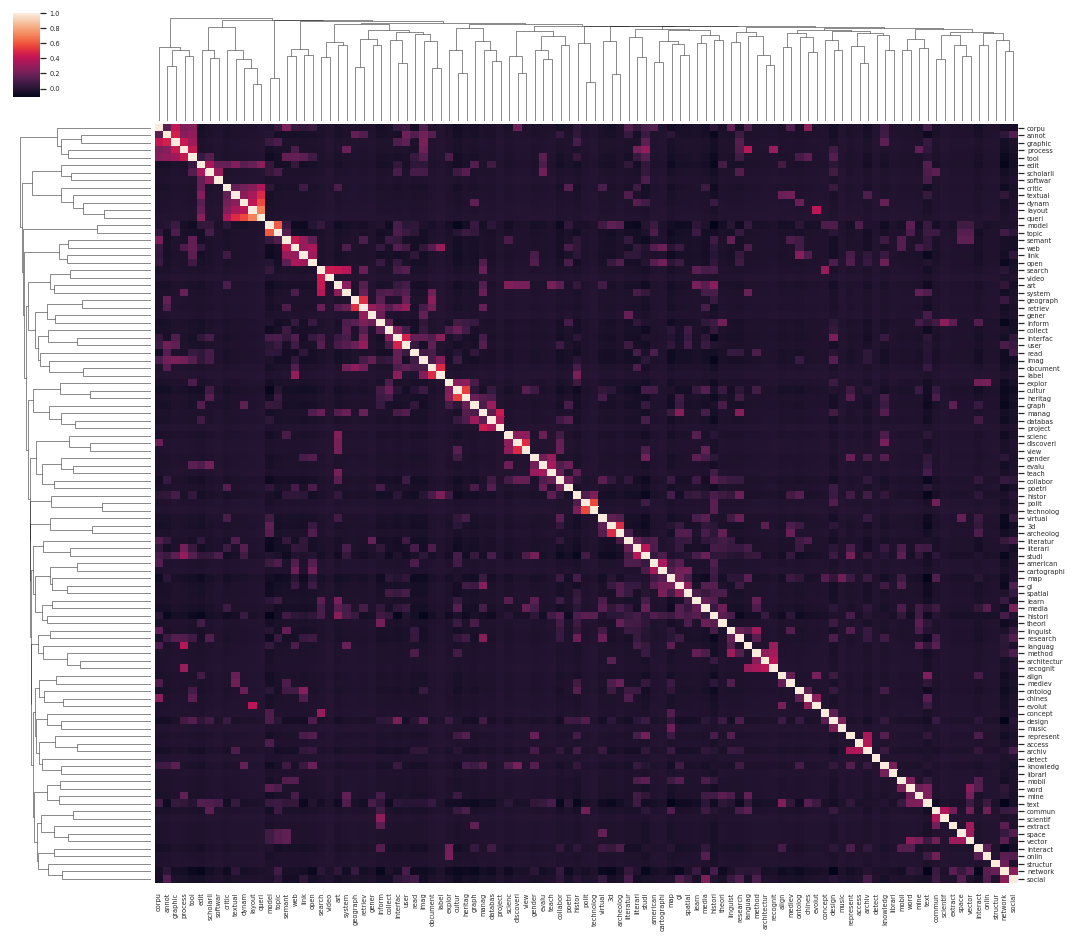

In [0]:
#@title Generate correlation matrix
keys = list(filtered_assoc.keys())
# print(keys)
keys.sort()
# print(keys)
key_doc_df = pd.DataFrame(index=keys)

for idx, a_row in all_keywords_df.iterrows():
  # print(idx)
  observation = []
  for keyword in key_doc_df.index:
    if keyword in a_row["reencoded_keywords"]:
      observation.append(1.0)
    else:
      observation.append(0.0)
  key_doc_df[idx] = observation

key_doc_df = key_doc_df.T 
# correlation_matrix = np.corrcoef(key_doc_df)
corr = key_doc_df.corr()
corr = corr.dropna(axis=0, how='all')
corr = corr.dropna(axis=1, how='all')
# for a in key_doc_df['adapt']:
#   print(a)
# for a in corr['adapt']:
#   print(a)
print(corr)
# # plt.matshow(correlation_matrix)
# plt.figure(figsize = (24,24))
sns.set(font_scale=0.6)
# sns.heatmap(corr)
sns.clustermap(corr, figsize=(18,16))

In [0]:
key_doc_df

,3d,access,align,american,annot,archeolog,architectur,archiv,art,cartographi,chines,collabor,collect,color,commun,concept,corpu,critic,cultur,databas,design,detect,discoveri,document,dynam,edit,evalu,event,evolut,explor,extract,gender,gener,geograph,gi,graph,graphic,heritag,histor,histori,...,open,philosophi,poetri,polit,process,project,qualit,queri,read,recognit,represent,research,retriev,scholarli,scienc,scientif,search,semant,social,softwar,space,spatial,structur,studi,system,tangibl,teach,technolog,text,textual,theori,tool,topic,user,vector,video,view,virtual,web,word
XGXZ888U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HEE6RPCS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WRVWCZMS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DDP9PP7G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TRCXVRHC,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5RG2J2X9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EJ3UQSQK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GI55X4WR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8L6NSCWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
UH9B2IBT,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
print(corr)

                   3d    access     align  ...   virtual       web      word
3d           1.000000 -0.017948 -0.031313  ...  0.161389 -0.042790 -0.025474
access      -0.017948  1.000000 -0.012551  ... -0.015457 -0.017152 -0.010211
align       -0.031313 -0.012551  1.000000  ... -0.026967 -0.029924 -0.017815
american    -0.025474 -0.010211 -0.017815  ... -0.021939  0.130573 -0.014493
annot       -0.040723 -0.016323 -0.028479  ... -0.035072 -0.038917 -0.023168
archeolog    0.504077 -0.011437 -0.019953  ...  0.128325 -0.027267 -0.016233
architectur  0.149256 -0.008827 -0.015400  ... -0.018965 -0.021045 -0.012528
archiv      -0.046692  0.384394 -0.032652  ...  0.056021 -0.044621 -0.026564
art         -0.038562 -0.015457 -0.026967  ...  0.081591 -0.036852 -0.021939
cartographi -0.017948 -0.007194 -0.012551  ... -0.015457  0.201145 -0.010211
chines      -0.025474 -0.010211 -0.017815  ... -0.021939 -0.024344 -0.014493
collabor     0.037114 -0.018716 -0.032652  ...  0.152255 -0.044621 -0.026564

In [0]:
key_doc_df

,3d,access,align,american,annot,archeolog,architectur,archiv,art,cartographi,chines,collabor,collect,color,commun,concept,corpu,critic,cultur,databas,design,detect,discoveri,document,dynam,edit,evalu,event,evolut,explor,extract,gender,gener,geograph,gi,graph,graphic,heritag,histor,histori,...,open,philosophi,poetri,polit,process,project,qualit,queri,read,recognit,represent,research,retriev,scholarli,scienc,scientif,search,semant,social,softwar,space,spatial,structur,studi,system,tangibl,teach,technolog,text,textual,theori,tool,topic,user,vector,video,view,virtual,web,word
XGXZ888U,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HEE6RPCS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WRVWCZMS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DDP9PP7G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TRCXVRHC,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5RG2J2X9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EJ3UQSQK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GI55X4WR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8L6NSCWR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
UH9B2IBT,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#@title Show most/less correlated
for idx, item in corr.iteritems():
  for col in corr.columns:
    if col > idx: #Show only one half
#       if item[col] >= 1 - thresold or item[col] <= -1 + thresold:
      if item[col] < -0.1 or item[col] > 0.5:
        print(idx, col, item[col])

3d archeolog 0.5040765522329747
cultur heritag 0.5503917639215123
design network -0.1127243068763869
dynam queri 0.5752771915110828
geograph retriev 0.5098526034828078
histori model -0.10763094284361534
layout queri 0.7058384271946793
map text -0.11121650964658344
model topic 0.6211540478625674
network text -0.10581320187175033
polit technolog 0.5752771915110844


In [0]:
#@title Cluster the correlation matrix and visualize it

X = corr.values
d = sch.distance.pdist(X, 'sqeuclidean')
# print(d)
L = sch.linkage(d, method='ward', metric='sqeuclidean')

# fig, ax = plt.subplots(figsize=(24, 15)) # set size
# ax = sch.dendrogram(
#     L, 
#     orientation="bottom",
#     leaf_font_size=8,
#     labels=corr.index.tolist(),
# #     truncate_mode='lastp',
# #     p=16,
#     show_contracted=True
# );

# plt.tick_params(\
#     axis= 'x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom='off',      # ticks along the bottom edge are off
#     top='off',         # ticks along the top edge are off
#     labelbottom='off')

# # plt.tight_layout() #show plot with tight layout

In [0]:
corr.index.copy()

Index(['3d', 'access', 'align', 'american', 'annot', 'archeolog',
       'architectur', 'archiv', 'art', 'cartographi',
       ...
       'theori', 'tool', 'topic', 'user', 'vector', 'video', 'view', 'virtual',
       'web', 'word'],
      dtype='object', length=101)

In [1]:
#@title fcluster
clustered_ks = sch.fcluster(L, d.max() * 0.95, criterion='distance')
keyws_clustered = pd.DataFrame({'cluster': clustered_ks}, index = corr.index.copy())

# pp.pprint(cluster_nos)
print('Generated {} clusters'.format(str(len(keyws_clustered.cluster.unique()))))
# for 


# for i in range(1,n_clusters + 1):
#   print("cluster #" + str(i))
#   print(keyws_clustered.loc[keyws_clustered['cluster'] == i].index.tolist())


NameError: ignored

In [0]:
keyws_clustered.head(10)

,cluster
3d,9
access,4
align,4
american,9
annot,12
archeolog,9
architectur,3
archiv,4
art,10
cartographi,9


In [0]:
#@title Create network from correlation matrix and plot
links = corr.stack().reset_index()
links.columns = ['keyword1', 'keyword2', 'weight']
# links


#Visualize

In [0]:
#@title Generate graph and calculate betweenness and density per cluster
groups = keyws_clustered.groupby(['cluster'])


groups_keys = dict()

for name, group in groups:
  for idx, a_row in group.iteritems():
    groups_keys[a_row[1]] = a_row.index.tolist()

G = nx.from_pandas_edgelist(links, 'keyword1', 'keyword2', ['weight']).to_undirected()

keyws_clustered['color'] = [d3["Category20"][20][int(k )%20-1] for k in clustered_ks ]


In [0]:
print(groups_keys)

{1: ['critic', 'dynam', 'layout', 'queri', 'textual'], 2: ['languag', 'literari', 'mine', 'mobil', 'studi', 'text', 'word'], 3: ['architectur', 'method', 'recognit'], 4: ['access', 'align', 'archiv', 'chines', 'design', 'evolut', 'histor', 'knowledg', 'librari', 'linguist', 'mediev', 'music', 'ontolog', 'polit', 'represent', 'research', 'technolog'], 5: ['cultur', 'databas', 'heritag', 'manag', 'project'], 6: ['commun', 'detect', 'explor', 'extract', 'graph', 'interact', 'network', 'onlin', 'scientif', 'social', 'space', 'structur', 'vector'], 7: ['model', 'topic'], 8: ['edit', 'scholarli', 'softwar'], 9: ['3d', 'american', 'archeolog', 'cartographi', 'gi', 'histori', 'learn', 'literatur', 'map', 'media', 'spatial', 'theori', 'virtual'], 10: ['art', 'concept', 'search', 'system', 'video'], 11: ['collabor', 'discoveri', 'evalu', 'gender', 'poetri', 'scienc', 'teach', 'view'], 12: ['annot', 'corpu', 'graphic', 'process', 'tool'], 13: ['link', 'open', 'semant', 'web'], 14: ['collect', 'do

In [0]:
def sort_stem(stem):
  return stemmed_keywords_counter[stem]

centrality_dict = nx.betweenness_centrality(G, k=2, normalized=True, weight='weight')
centralities_df = pd.DataFrame(index=list(groups_keys.keys()), columns=['centrality', 'members_no', 'top_words', 'members', 'avg_freq', 'coword_freq'])

all_keywords_list = all_keywords_df['reencoded_keywords'].tolist()
for key,val in groups_keys.items():
  print('Cluster #' + str(key))
  sum_b = 0
  for kw in val:
    print(kw, centrality_dict[kw])
    sum_b+=centrality_dict[kw]

  val.sort(reverse=True, key=sort_stem)
  ocs = [] 
  coocs = []
  for k in val:
    times = 0
    for l in all_keywords_list:
      if k in l:
        times += 1
    ocs.append(times)

  for (k1, k2) in itertools.combinations(val, 2):
    times = 0
    selSet = set([k1, k2])
    for l in all_keywords_list:
      if selSet.issubset(set(l)):
        times += 1
    coocs.append(times)
  



  centralities_df.loc[key,'centrality'] = sum_b/len(val)
  centralities_df.loc[key,'members_no'] = len(val) 
  centralities_df.loc[key]['top_words'] = val[:5]
  centralities_df.loc[key]['members'] = val
  centralities_df.loc[key,'avg_freq'] = sum(ocs)/len(ocs)
  centralities_df.loc[key,'coword_freq'] = sum(coocs)/len(coocs)
  
  
  print('Average centrality is: ' + str(sum_b/len(val)))

  
print(centralities_df)

Cluster #1
critic 0.5815151515151515
dynam 0.27035353535353535
layout 0.14282828282828283
queri 0.030606060606060605
textual 0.3009595959595959
Average centrality is: 0.26525252525252524
Cluster #2
languag 0.46419191919191916
literari 0.8722727272727272
mine 0.255050505050505
mobil 0.31116161616161614
studi 0.913080808080808
text 0.9538888888888889
word 0.29075757575757577
Average centrality is: 0.58005772005772
Cluster #3
architectur 0.28055555555555556
method 0.32136363636363635
recognit 0.12242424242424242
Average centrality is: 0.24144781144781147
Cluster #4
access 0.18873737373737373
align 0.5407070707070707
archiv 0.8263636363636363
chines 0.36217171717171714
design 0.9742929292929293
evolut 0.26015151515151513
histor 0.9232828282828283
knowledg 0.6529292929292929
librari 0.13262626262626262
linguist 0.6733333333333333
mediev 0.4335858585858586
music 0.051010101010101006
ontolog 0.5917171717171718
polit 0.22954545454545455
represent 0.42338383838383836
research 0.7345454545454545

In [0]:
keyws_clustered.head(10)

,cluster,color
3d,9,#9467bd
access,4,#ffbb78
align,4,#ffbb78
american,9,#9467bd
annot,12,#c49c94
archeolog,9,#9467bd
architectur,3,#ff7f0e
archiv,4,#ffbb78
art,10,#c5b0d5
cartographi,9,#9467bd


In [0]:
measures_df = pd.DataFrame(index=keyws_clustered.cluster.unique(), columns=["inside", "density"])
measures_df['inside'] = np.empty((len(measures_df), 0)).tolist()

for u,v,a in G.edges(data=True):
  if u == v:
    continue
  if keyws_clustered.loc[u]['cluster'] == keyws_clustered.loc[v]['cluster']:
    measures_df.loc[keyws_clustered.loc[u, 'cluster']]['inside'].append(a['weight'])

for idx, a_row in measures_df.iterrows():
  measures_df.loc[idx, 'density'] = np.mean(a_row['inside'])




In [0]:
measures_df

,inside,density
9,"[-0.025474090105633146, 0.5040765522329747, -0...",0.0577213
4,"[-0.01255142235024498, 0.3843939595051386, -0....",0.0229449
12,"[0.14931820976881677, 0.46336536457127847, 0.2...",0.328083
3,"[0.27980131126209085, 0.40309986725680125, 0.3...",0.343358
10,"[-0.01545714244425141, 0.43412008504427213, 0....",0.180627
11,"[0.18283907437135843, 0.11647239435344474, -0....",0.109141
14,"[-0.021938759329499104, -0.015457142444251403,...",0.0997255
6,"[-0.009586621809050792, -0.023695618019100636,...",0.0352682
1,"[0.20552701211925115, 0.2580559620363768, 0.37...",0.381945
5,"[0.047751820907884324, 0.5503917639215123, -0....",0.175295


In [0]:
centralities_df

,centrality,members_no,top_words,members,avg_freq,coword_freq
1,0.265253,5,"[critic, textual, dynam, layout, queri]","[critic, textual, dynam, layout, queri]",3.4,1
2,0.580058,7,"[text, studi, literari, languag, mine]","[text, studi, literari, languag, mine, mobil, ...",13.8571,1.57143
3,0.241448,3,"[architectur, method, recognit]","[architectur, method, recognit]",3,1
4,0.471093,17,"[design, histor, archiv, knowledg, research]","[design, histor, archiv, knowledg, research, l...",6.76471,0.316176
5,0.514182,5,"[cultur, heritag, databas, manag, project]","[cultur, heritag, databas, manag, project]",8,1.3
6,0.428877,13,"[network, social, interact, graph, commun]","[network, social, interact, graph, commun, exp...",8.69231,0.461538
7,0.915631,2,"[model, topic]","[model, topic]",21.5,13
8,0.448889,3,"[edit, scholarli, softwar]","[edit, scholarli, softwar]",6.66667,1.66667
9,0.661562,13,"[histori, map, media, 3d, literatur]","[histori, map, media, 3d, literatur, spatial, ...",11.9231,1.01282
10,0.325444,5,"[art, search, system, concept, video]","[art, search, system, concept, video]",4.4,0.9


In [0]:
concat_frame =  pd.concat([dh_papers_df, vis4dh_papers_df, citations_df])
reenc_keywords_list = concat_frame['reencoded_keywords'].tolist()
for idx, a_row in centralities_df.iterrows():
  print(idx)
  print('Top papers:')
  print(a_row['members'])
  for i, s in enumerate(reenc_keywords_list):
    if set(a_row['top_words']) & set(s): 
      # if 'Workshop' in concat_frame.iloc[i]['publication_title']:
      print(concat_frame.iloc[i]['author_keywords'], concat_frame.iloc[i]['title'])
      print()
  print()
  print()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


1
Top papers:
['critic', 'textual', 'dynam', 'layout', 'queri']
tei;digital archive;prosopography;network analysis;textual scholarship Visualizing the Digital Mitford Project’s Prosopography Data

new testament;phylogenetic analysis;critical editions;collation algorithms;simulation Digital New Testament

entity linking;visualization;literary criticism;tei REDEN ONLINE: Disambiguation, Linking and Visualisation of References in TEI Digital Editions

torture;critical digital media;virtual reality;iraq;interdisciplinary;media art Addressing Torture in Iraq through Critical Digital Media Art—Hearts and Minds: The Interrogations Project

ontologies;information visualization;ontologies visualization;dynamic knowledge;literary computing When Traditional Ontologies are not Enough: Modelling and Visualizing Dynamic Ontologies in Semantic-Based Access to Texts

text alignment;visualization;textual variance;medieval french Visualizing Mouvance: Towards an Alignment of Medieval Vernacular Text Tra

In [0]:
stemmed_keywords_counter['mine']

6

In [0]:
measures_df = pd.concat([measures_df, centralities_df], axis=1)

def cluster_color(x):
  return d3["Category20"][20][int(x)%20-1]

measures_df.reset_index(inplace=True)

measures_df['color'] = measures_df['index'].apply(cluster_color)

measures_df.set_index('index', drop=True, inplace=True)

In [0]:
measures_df = measures_df.drop(['inside'], axis=1)


In [0]:
measures_df

,density,centrality,members_no,top_words,members,avg_freq,coword_freq,color
index,,,,,,,,
1,0.381945,0.265253,5,"[critic, textual, dynam, layout, queri]","[critic, textual, dynam, layout, queri]",3.4,1,#1f77b4
2,0.0925342,0.580058,7,"[text, studi, literari, languag, mine]","[text, studi, literari, languag, mine, mobil, ...",13.8571,1.57143,#aec7e8
3,0.343358,0.241448,3,"[architectur, method, recognit]","[architectur, method, recognit]",3,1,#ff7f0e
4,0.0229449,0.471093,17,"[design, histor, archiv, knowledg, research]","[design, histor, archiv, knowledg, research, l...",6.76471,0.316176,#ffbb78
5,0.175295,0.514182,5,"[cultur, heritag, databas, manag, project]","[cultur, heritag, databas, manag, project]",8,1.3,#2ca02c
6,0.0352682,0.428877,13,"[network, social, interact, graph, commun]","[network, social, interact, graph, commun, exp...",8.69231,0.461538,#98df8a
7,0.621154,0.915631,2,"[model, topic]","[model, topic]",21.5,13,#d62728
8,0.282129,0.448889,3,"[edit, scholarli, softwar]","[edit, scholarli, softwar]",6.66667,1.66667,#ff9896
9,0.0577213,0.661562,13,"[histori, map, media, 3d, literatur]","[histori, map, media, 3d, literatur, spatial, ...",11.9231,1.01282,#9467bd


In [0]:
for n in measures_df['coword_freq'].tolist():
  print('%.3f' % n)

1.000
1.571
1.000
0.316
1.300
0.462
13.000
1.667
1.013
0.900
0.536
2.500
3.833
0.836


In [0]:
#@title Set up graph parameters 🕸 { run: "auto" }
correlation_strenght = 0.2 #@param {type:"slider", min:0.10, max:0.90, step:0.01}

links_filtered=links.loc[ (links['weight'] > correlation_strenght) & (links['keyword1'] != links['keyword2']) ].copy()
links_filtered['weight_2'] = links_filtered['weight'] * 10

# links_filtered.loc[:,'weight_edge'] = links_filtered.loc[:,'weight'] / 2


# G_filtered = nx.from_pandas_edgelist(links_filtered, 'keyword1', 'keyword2', ['weight', 'weight_edge'])
G_filtered = nx.from_pandas_edgelist(links_filtered, 'keyword1', 'keyword2', ['weight', 'weight_2'])
# G = nx.from_pandas_edgelist(links_filtered, 'keyword1', 'keyword2')
# print(len(G_filtered.nodes()))
# print(G_filtered.number_of_nodes())
# print(G_filtered.nodes())
# print(G_filtered.edges())

# print(keyws_clustered.shape)
# print(1/math.sqrt(G_filtered.number_of_nodes()))


for n in G_filtered.copy().nodes():
  G_filtered.node[n]['radius'] = np.log(stemmed_keywords_counter[n] + 2) / 100

keyws_clustered_g = keyws_clustered.reindex(G_filtered.nodes())

# nx.set_edge_attributes(G_filtered, edge_attrs, "edge_color")
nx.set_node_attributes(G_filtered, keyws_clustered['color'], "color")
nx.set_node_attributes(G_filtered, keyws_clustered['cluster'], "cluster")

keyws_clustered_g = keyws_clustered_g.filter(G_filtered.nodes(), axis=0)


df_pos = pd.DataFrame(index=G_filtered.nodes(), columns=G_filtered.nodes())
for a_row, data in nx.shortest_path_length(G_filtered):
    for col, dist in data.items():
        df_pos.loc[a_row,col] = dist * 1.7

df_pos = df_pos.fillna(df_pos.max().max() * 0.6)

In [0]:
#@title Draw map and strategic diagram

def scatter_circle_size(members_no):
  return members_no * 2.5


measures_df['circle_size'] = measures_df['members_no'].apply(scatter_circle_size)
source_st = ColumnDataSource(measures_df)

p = figure(plot_width=800, plot_height=800, tooltips=[("top words", "@top_words")])
p.scatter(x='centrality', y='density', source=source_st, size="circle_size", fill_color="color")
p.xaxis[0].axis_label = 'Centrality'
p.yaxis[0].axis_label = 'Density'

x_lines_padding = 0.2 * measures_df['centrality'].median()
y_lines_padding = 0.2 * measures_df['density'].median()

#vertical median
p.line(x=[measures_df['centrality'].median(), measures_df['centrality'].median()],
       y=[-x_lines_padding, measures_df['density'].max() + x_lines_padding])

#horizontal median
p.line(x=[measures_df['centrality'].min() - y_lines_padding,
          measures_df['centrality'].max() + y_lines_padding],
       y=[measures_df['density'].median(), measures_df['density'].median()])

p.add_layout(LabelSet(x='centrality', 
                  y='density', 
                  text='index', 
                  source=source_st, 
                  text_align='center', 
                  text_baseline='hanging',
                  y_offset=-5,
                  text_font_size='9pt'))

# p.add_layout(LabelSet(x=0.3, 
#                   y=[-0.5], 
#                   text=['Undeveloped'], 
#                   background_fill_color='white',
#                   background_fill_alpha=0.5,
#                   source=source_st, 
#                   text_align='center', 
#                   text_baseline='hanging',
#                   y_offset=-5,
#                   text_font_size='12pt'))




#Show with Bokeh
plot = Plot(plot_width=800, plot_height=800,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))
plot.title.text = "Keywords Map"

node_hover_tool = HoverTool(tooltips=[("keyword", "@index"), ("cluster", "@cluster")])
plot.add_tools(node_hover_tool, BoxZoomTool(), ResetTool(), PanTool(), WheelZoomTool(), SaveTool())

# graph_renderer = from_networkx(G, nx.spring_layout, scale=1, k=0.09, center=(0, 0))
graph_renderer = from_networkx(G_filtered, nx.kamada_kawai_layout, scale=1.0, dim=2, dist=df_pos.to_dict())

 
graph_renderer.node_renderer.glyph = Circle(radius='radius', fill_color="color")
graph_renderer.edge_renderer.glyph = MultiLine(line_color="black", line_alpha=0.7, line_width='weight_2')
plot.renderers.append(graph_renderer)


x, y = zip(*graph_renderer.layout_provider.graph_layout.values())
node_labels = nx.nodes(G_filtered)

source = ColumnDataSource({'x': x, 'y': y,
                           'key': [l for l in node_labels]})


labels = LabelSet(x='x', 
                  y='y', 
                  text='key', 
                  source=source,
                  background_fill_color='white',
                  background_fill_alpha=0.8,
                  text_align='center', 
                  text_baseline='middle',
                  x_offset=5,
                  y_offset=15,
                  text_font_size='0.6em')

plot.renderers.append(labels)
# output_notebook()
# show(plot)


#



output_notebook()
show(row(p, plot))



In [0]:
# nx.draw_circular(G, with_labels=True, node_color='orange', node_size=400, edge_color='black', linewidths=1, font_size=15)
# plt.figure(figsize=(22,22))
# # nx.draw_kamada_kawai(G, scale=2, with_labels=True,node_size=80,font_size=12)
# # nx.draw_spring(G, scale=2, with_labels=True,node_size=12,font_size=12)
# # nx.draw(G, pos=nx.spring_layout(G, k=0.12, weight='weight'),node_color=keyws_clustered_g['cluster'], cmap=plt.cm.Set1, node_size=400, font_size=16)
# nx.draw(G_filtered, with_labels=True, pos=nx.kamada_kawai_layout(G_filtered, scale=2, center=[0,0], dim=2, dist=df_pos.to_dict()), node_color=keyws_clustered_g['cluster'], cmap=plt.cm.Set1, node_size=200, font_size=22, width=1)
